<a href="https://colab.research.google.com/github/KimJunGu9/5.ML-DL/blob/main/9_%EC%95%99%EC%83%81%EB%B8%94_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 앙상블(Ensemble)

머신러닝 앙상블이란 여러개의 머신러닝 모델을 이용해 최적의 답을 찾아내는 기법
* 앙상블 기법의 종류
  * 보팅(Voting): 투표를 통해 결과를 도출
  * 배깅(Bagging): 샘플 중복 생성을 통해 결과를 도출
  * 부스팅(Boosting): 이전 오차를 보완하면서 가중치를 부여
  * 스태킹(Stacking): 여러 모델을 기반으로 예측된 결과를 통해 meta 모델이 다시 한번 예측

In [ ]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True)
#from sklearn.datasets import load_diabetes
from keras.datasets import boston_housing

from sklearn.model_selection import train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [ ]:
# 훈련 데이터를 DataFrame으로 변환
df_train = pd.DataFrame(x_train)

# 타겟값을 새로운 열로 추가
df_train['MEDV'] = y_train

# 테스트 데이터를 DataFrame으로 변환
df_test = pd.DataFrame(x_test)

# 타겟값을 새로운 열로 추가
df_test['MEDV'] = y_test

In [ ]:
# data = load_boston()
# df = pd.DataFrame(data['data'], columns=data['feature_names'])
# df['MEDV'] = data['target']
# x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', 1), df['MEDV'], random_state=42)




In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

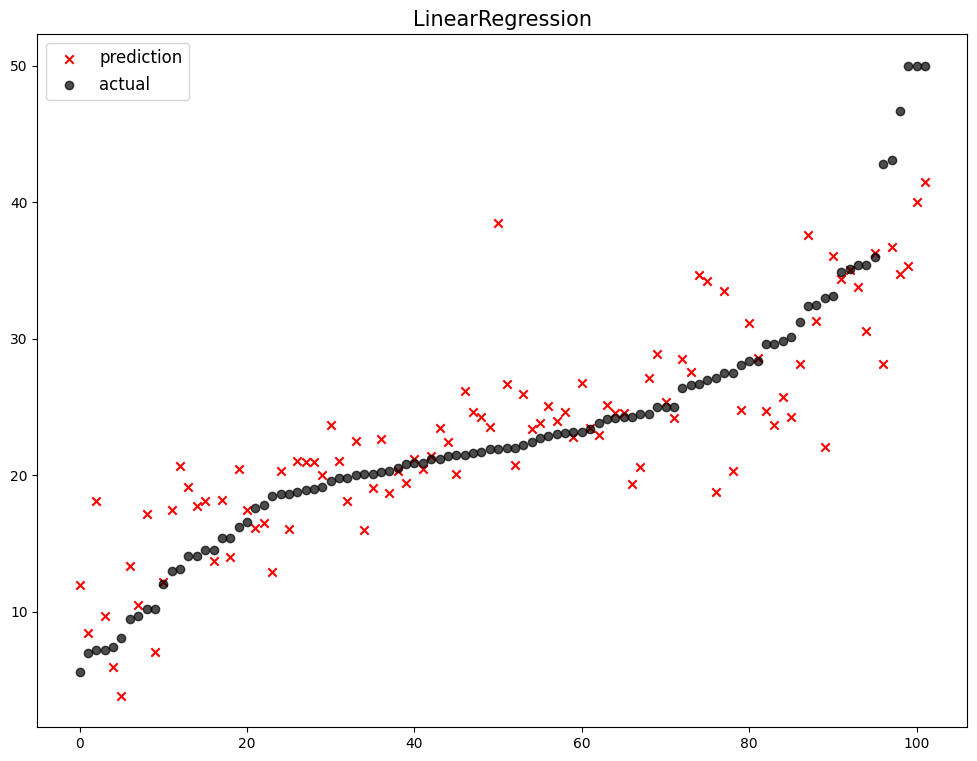

              model        mse
0  LinearRegression  23.195599


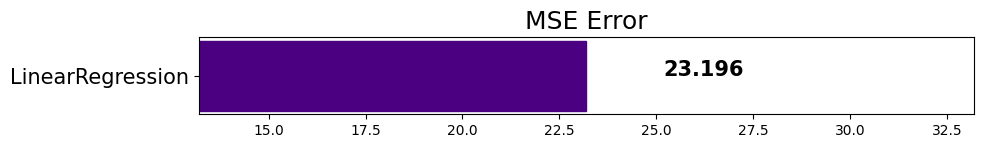

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

linear_reg = LinearRegression(n_jobs=-1)
linear_reg.fit(x_train, y_train)
pred = linear_reg.predict(x_test)
mse_eval('LinearRegression', pred, y_test)

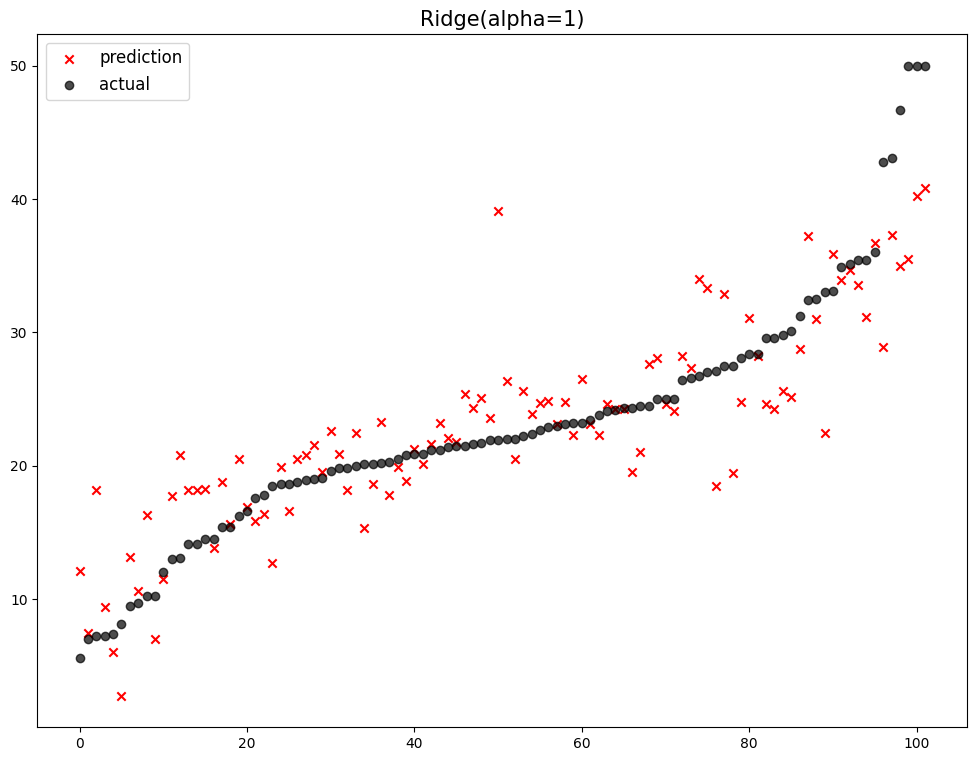

              model        mse
0  LinearRegression  23.195599
1    Ridge(alpha=1)  22.548159


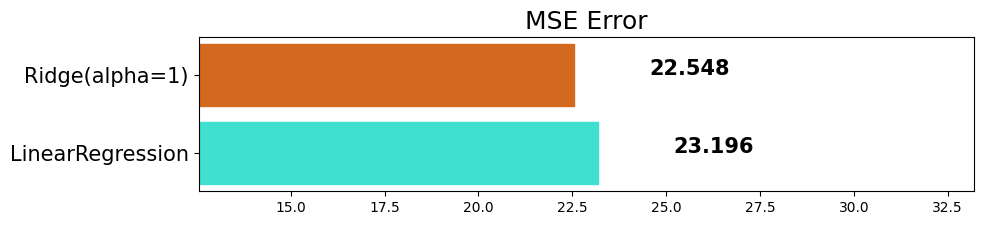

In [ ]:
ridge = Ridge(alpha=1)
ridge.fit(x_train, y_train)
pred = ridge.predict(x_test)
mse_eval('Ridge(alpha=1)', pred, y_test)

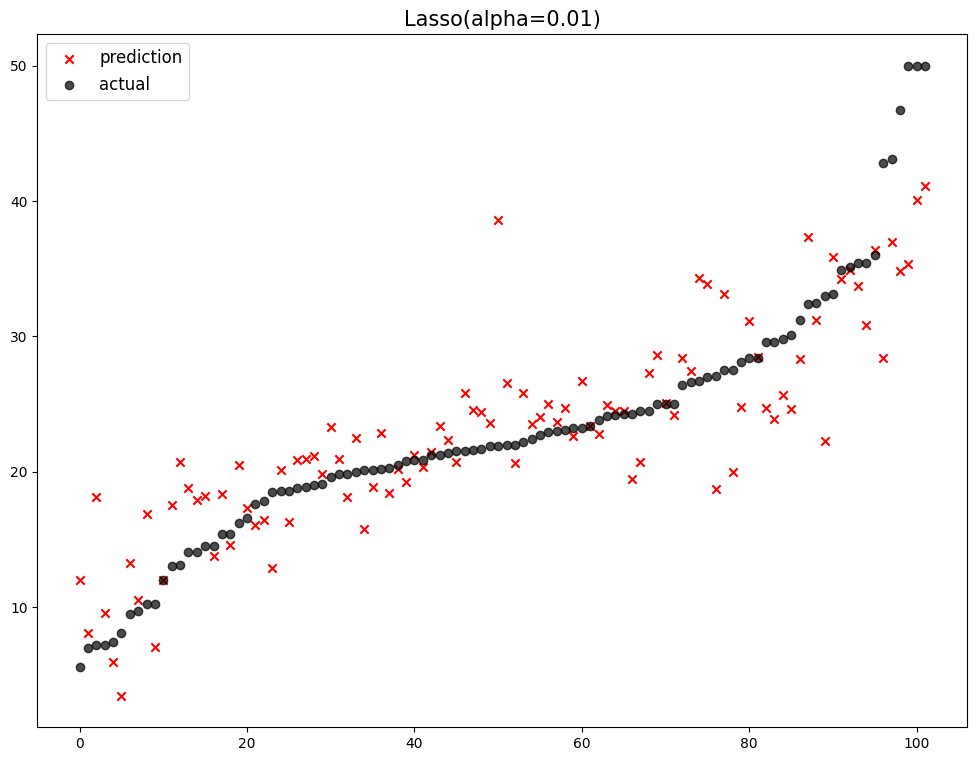

               model        mse
0   LinearRegression  23.195599
1  Lasso(alpha=0.01)  22.791476
2     Ridge(alpha=1)  22.548159


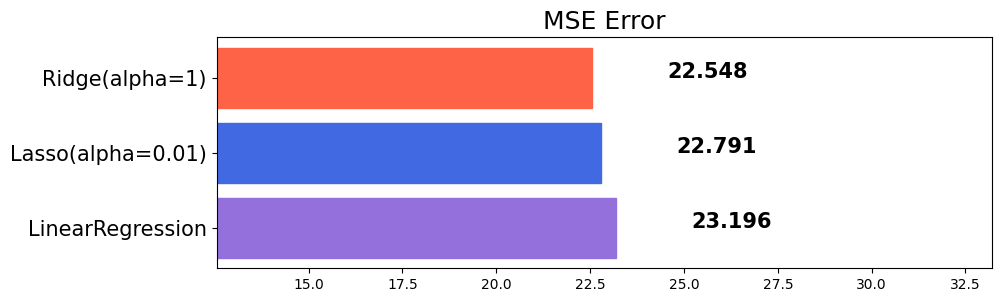

In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)
pred = lasso.predict(x_test)
mse_eval('Lasso(alpha=0.01)', pred, y_test)

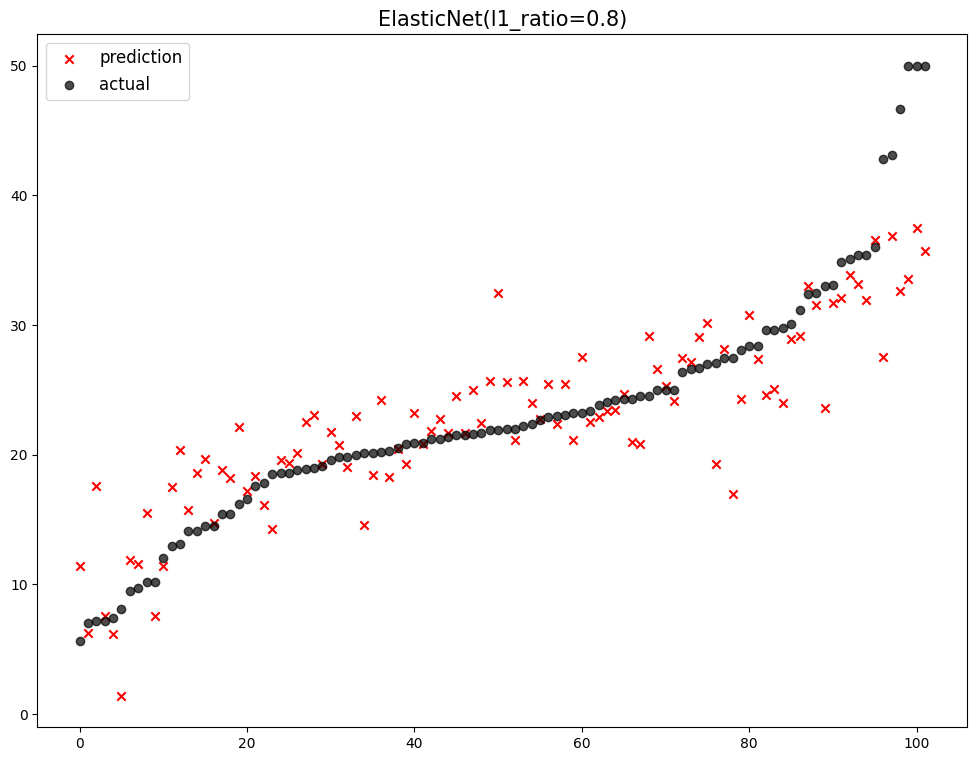

                      model        mse
0          LinearRegression  23.195599
1  ElasticNet(l1_ratio=0.8)  22.799971
2         Lasso(alpha=0.01)  22.791476
3            Ridge(alpha=1)  22.548159


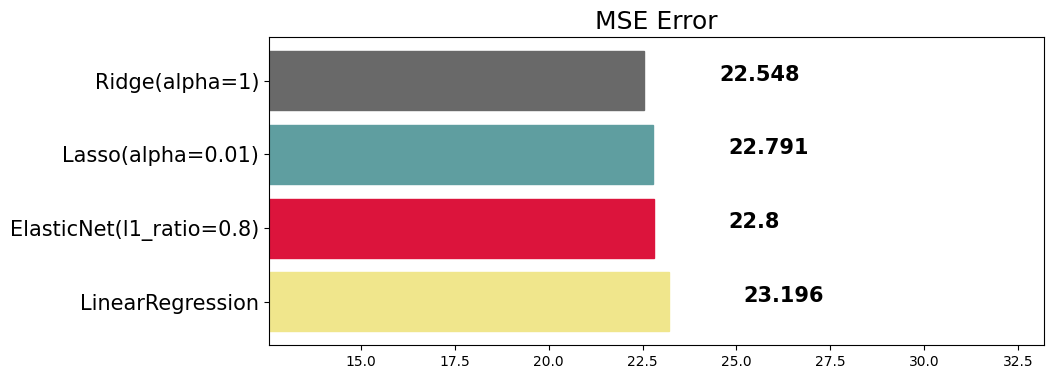

In [ ]:
elasticnet = ElasticNet(alpha=0.5, l1_ratio=0.8)
elasticnet.fit(x_train, y_train)
pred = elasticnet.predict(x_test)
mse_eval('ElasticNet(l1_ratio=0.8)', pred, y_test) 

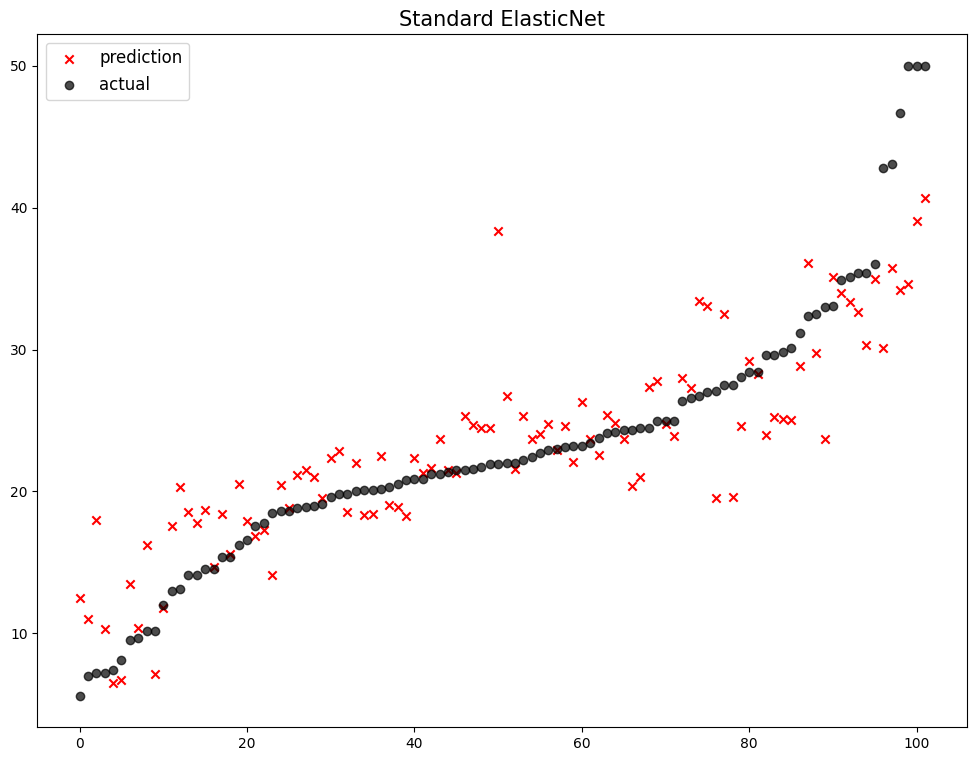

                      model        mse
0          LinearRegression  23.195599
1  ElasticNet(l1_ratio=0.8)  22.799971
2         Lasso(alpha=0.01)  22.791476
3            Ridge(alpha=1)  22.548159
4       Standard ElasticNet  21.773979


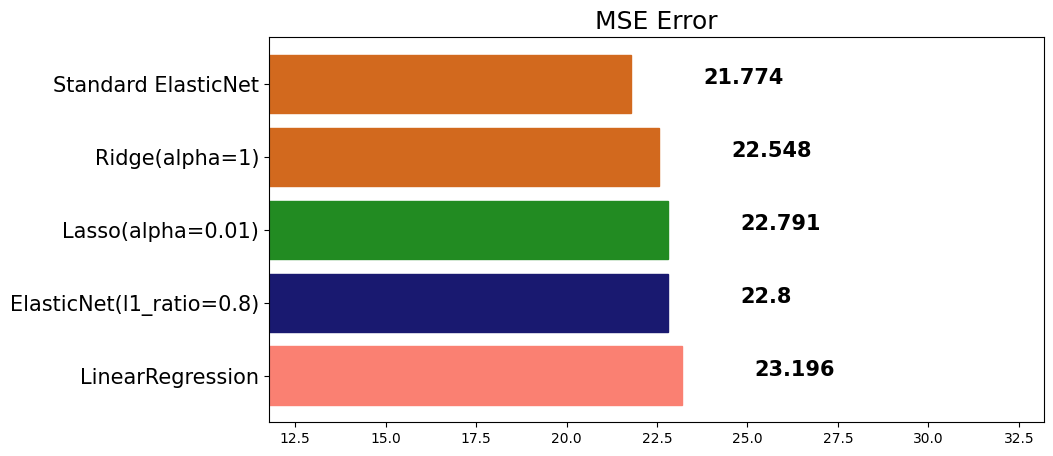

In [ ]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.036e+01, tolerance: 3.419e+00
  model = cd_fast.enet_coordinate_descent(


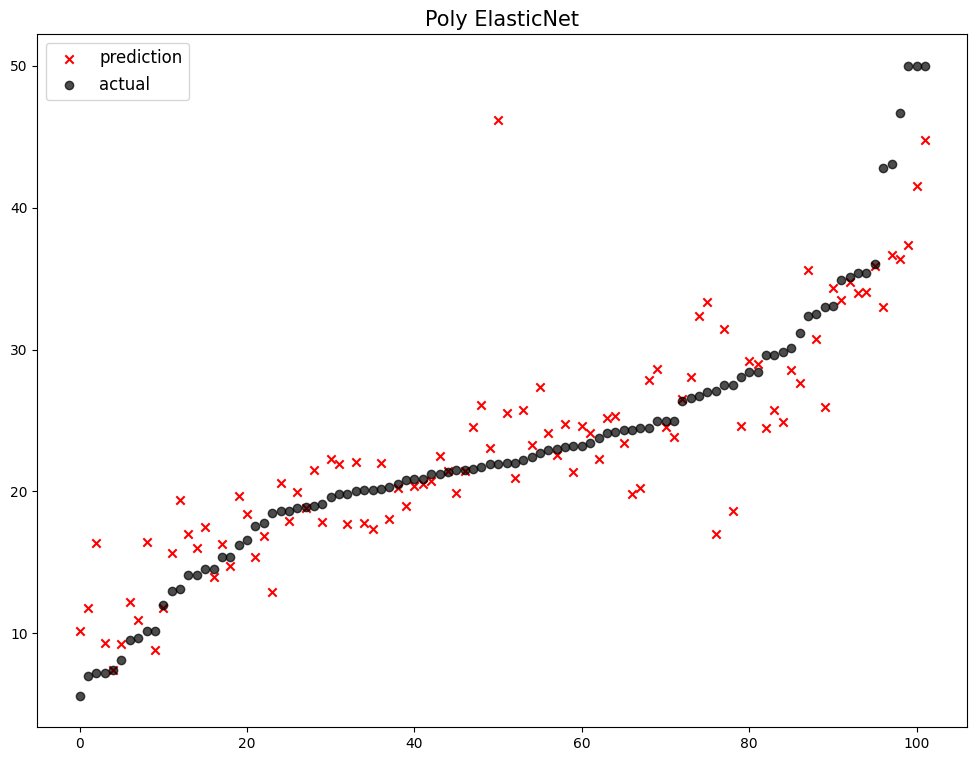

                      model        mse
0          LinearRegression  23.195599
1  ElasticNet(l1_ratio=0.8)  22.799971
2         Lasso(alpha=0.01)  22.791476
3            Ridge(alpha=1)  22.548159
4       Standard ElasticNet  21.773979
5           Poly ElasticNet  20.157646


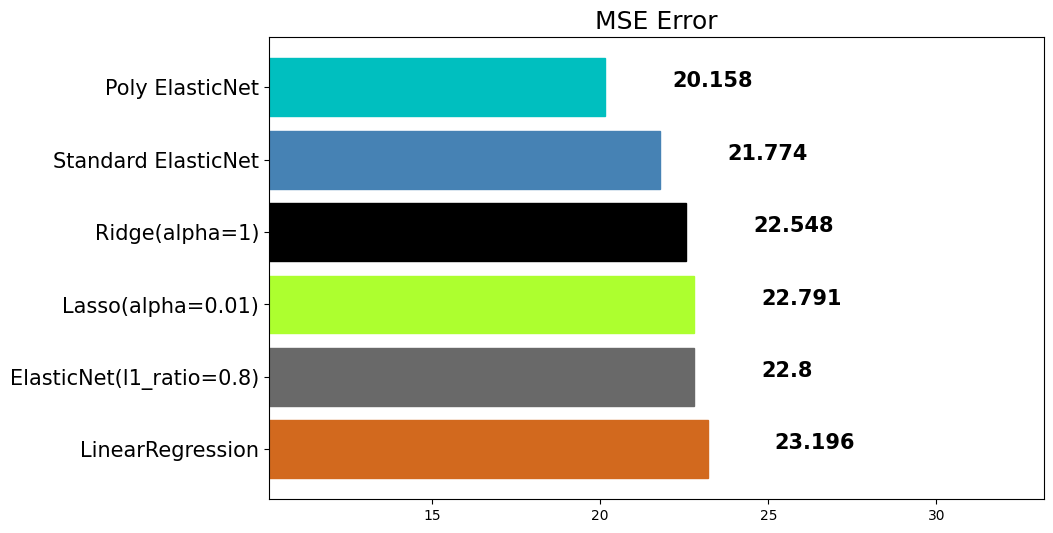

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('Poly ElasticNet', poly_pred, y_test)

### 1-1. 보팅 - 회귀
* 투표를 통해 결정하는 방식
* Bagging과 투표방식이라는 점에서 유사하지만 아래와 같은 큰 차이점이 있음
  1. Voting은 다른 알고리즘 model을 조합해서 사용
  2. Bagging은 같은 알고리즘 내에서 다른 sample 조합을 사용

In [ ]:
from sklearn.ensemble import VotingRegressor, VotingClassifier

In [ ]:
# 반드시 Tuple 형태로 모델을 정의해야함
single_models = [
    ('linear_reg', linear_reg),
    ('ridge', ridge),
    ('lasso', lasso),
    ('elasticnet_pipeline', elasticnet_pipeline),
    ('poly_pipeline', poly_pipeline)
]

In [ ]:
voting_regressor = VotingRegressor(single_models, n_jobs=-1)

In [ ]:
voting_regressor.fit(x_train, y_train)

VotingRegressor(estimators=[('linear_reg', LinearRegression(n_jobs=-1)),
                            ('ridge', Ridge(alpha=1)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elasticnet_pipeline',
                             Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))])),
                            ('poly_pipeline',
                             Pipeline(steps=[('polynomialfeatures',
                                              PolynomialFeatures(include_bias=False)),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('elasticnet',
                                              ElasticNet(alpha=0.1,
                                                         l1_ratio=0.2))]))],
                n_jobs=-1)

In [ ]:
voting_pred = voting_regressor.predict(x_test)

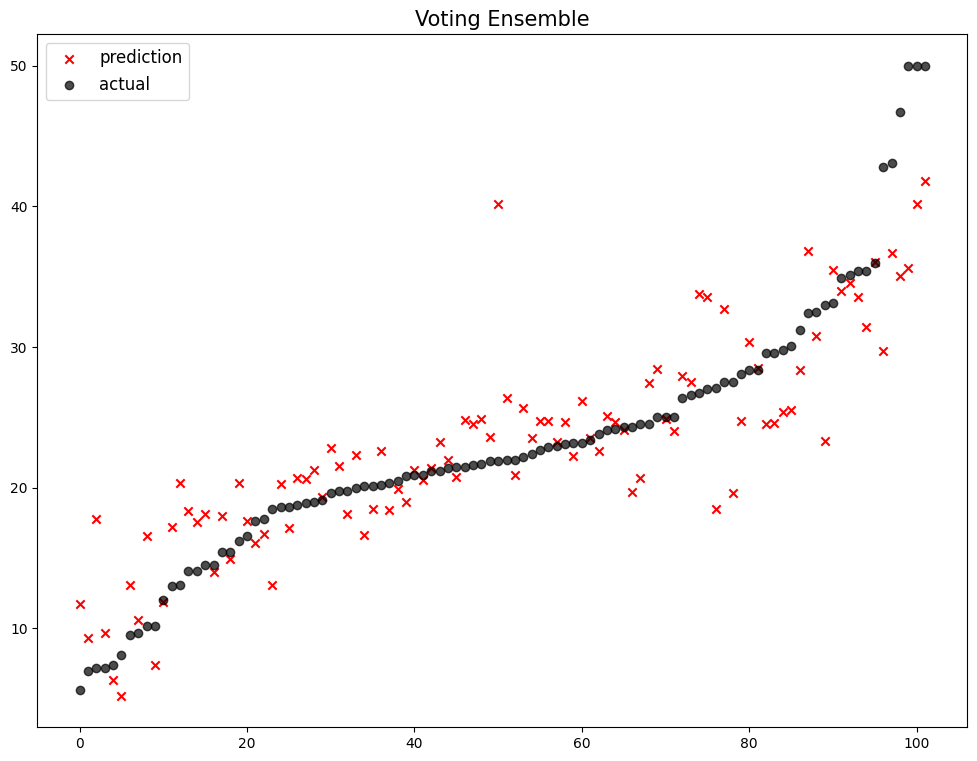

                      model        mse
0          LinearRegression  23.195599
1  ElasticNet(l1_ratio=0.8)  22.799971
2         Lasso(alpha=0.01)  22.791476
3            Ridge(alpha=1)  22.548159
4       Standard ElasticNet  21.773979
5           Voting Ensemble  21.480393
6           Poly ElasticNet  20.157646


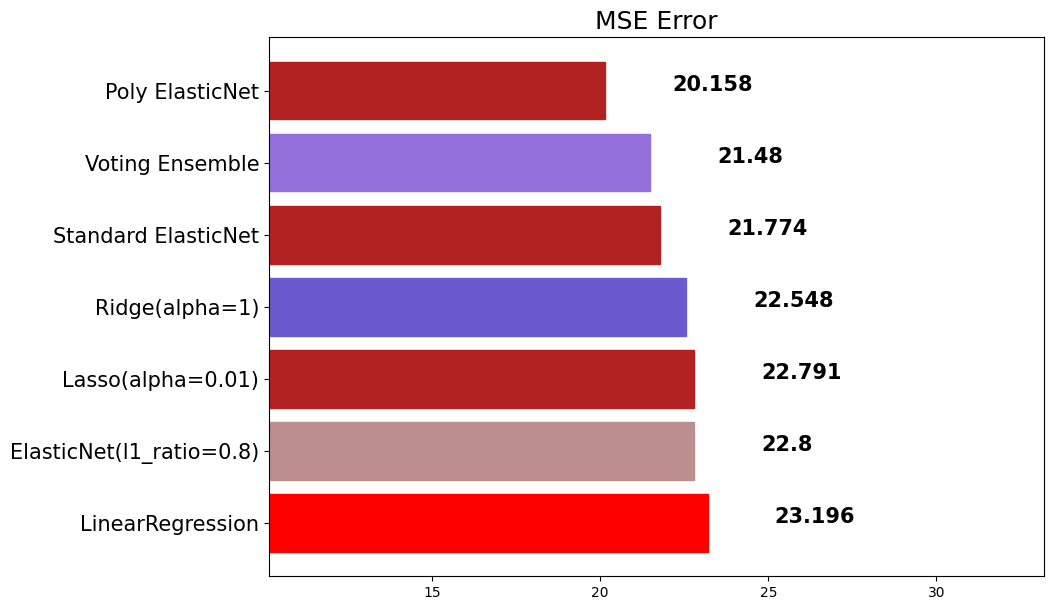

In [ ]:
mse_eval('Voting Ensemble', voting_pred, y_test) # voting_pred : 예측값 

### 1-2. 보팅 - 분류
* 분류기 모델을 만들 때, Voting 앙상블은 중요한 parameter가 존재함
* voting = {'hard', 'soft'}
* hard: class를 0, 1로 분류 예측을 하는 이진 분류일 때 결과 값에 대한 다수 class를 차용
  * 예) 분류를 예측한 값이 1, 0, 0, 1, 1 이였다면 1이 3표, 0이 2표를 받았으므로 1이 최종 값으로 예측을 하게 됨
* soft: 각각의 확률의 평균 값을 계산한다음에 가장 확률이 높은 값으로 확정
  * 예) class 0이 나올 확률이 (0.4, 0.9, 0.9, 0.4, 0.4)이었고, class 1이 나올 확률이 (0.6, 0.1, 0.1, 0.6, 0.6)이었다면
    * class 0이 나올 최종 확률은 (0.4+0.9+0.9+0.4+0.4)/5 = 0.6
    * class 1이 나올 최종 확률은 (0.6+0.1+0.1+0.6+0.6)/5 = 0.4  
  가 되기 때문에 class 0이 최종으로 확률이 높은 값으로 확정

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier

In [ ]:
models = [
    ('Logi', LogisticRegression()),
    ('ridge', RidgeClassifier())
]

In [ ]:
vc = VotingClassifier(models, voting='hard')

### 1-3. 배깅(Bagging)
* Bagging은 Bootstrap Aggregating의 줄임말
* Bootstrap은 여러개의 dataset을 중첩을 허용하게 하여 샘플링하여 분할하는 방식
  * 예) 데이터셋의 구성이 [1, 2, 3, 4, 5]로 되어 있다면,
    1. group1 = [1, 2, 3]
    2. group2 = [1, 3, 4]
    3. group3 = [2, 3, 5]
* 대표적인 Bagging 앙상블
  * Random Forest
  * Bagging

### 1-4. Random Forest
* Decision Tree(트리) 기반 Bagging 앙상블
* 굉장히 인기있는 앙상블 모델
* 사용성이 쉽고, 성능도 우수함

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

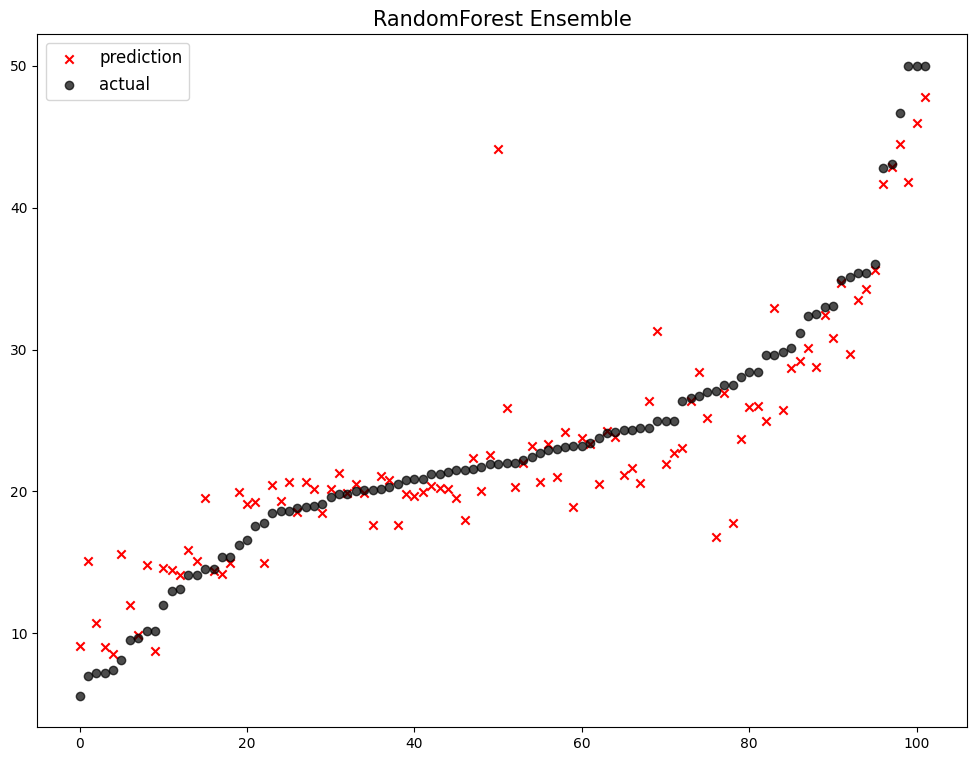

                      model        mse
0          LinearRegression  23.195599
1  ElasticNet(l1_ratio=0.8)  22.799971
2         Lasso(alpha=0.01)  22.791476
3            Ridge(alpha=1)  22.548159
4       Standard ElasticNet  21.773979
5           Voting Ensemble  21.480393
6           Poly ElasticNet  20.157646
7     RandomForest Ensemble  13.849757


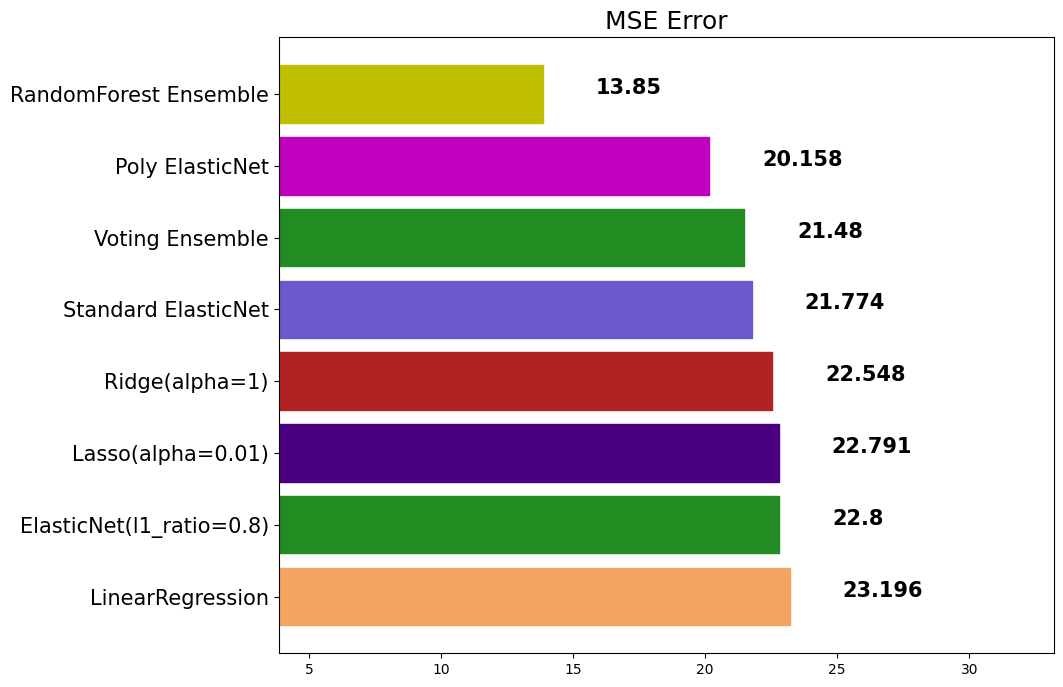

In [ ]:
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble', rfr_pred, y_test)

* ------------하이퍼 파라미터------------

* max_depth: 깊어질 수 있는 최대 깊이. 과대적합 방지용
* n_estimators: 앙상블하는 트리의 개수
* max_features: 최대로 사용할 feature의 개수. 과대적합 방지용
* min_samples_split: 트리가 분할할 때 최소 샘플의 개수. default=2. 과대적합 방지용

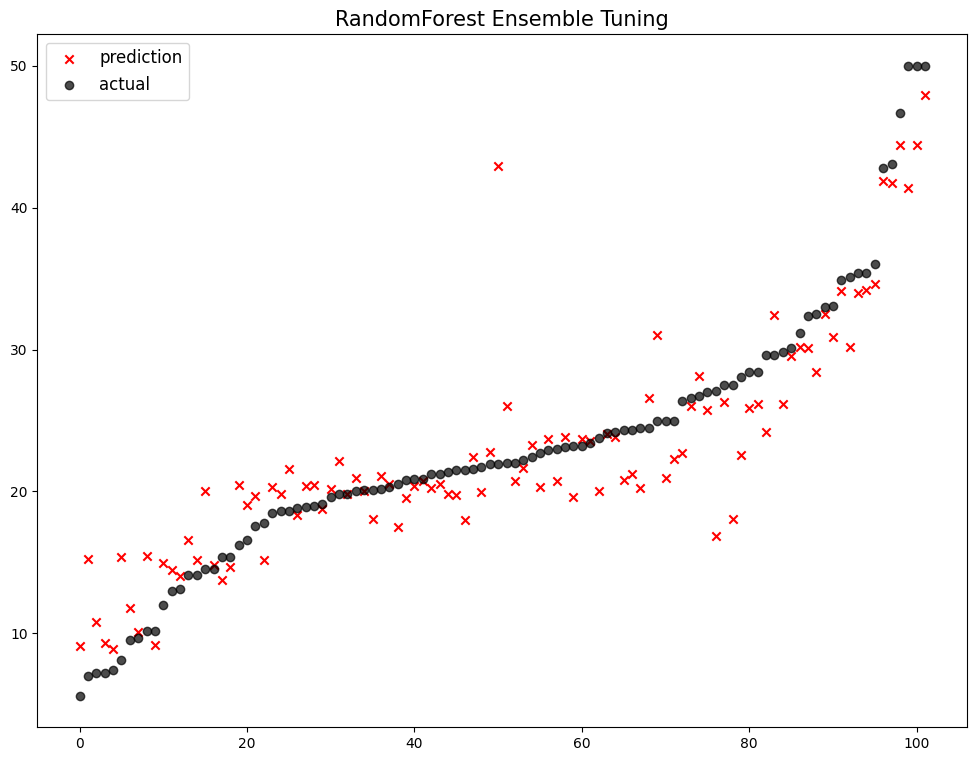

                          model        mse
0              LinearRegression  23.195599
1      ElasticNet(l1_ratio=0.8)  22.799971
2             Lasso(alpha=0.01)  22.791476
3                Ridge(alpha=1)  22.548159
4           Standard ElasticNet  21.773979
5               Voting Ensemble  21.480393
6               Poly ElasticNet  20.157646
7  RandomForest Ensemble Tuning  13.995044
8         RandomForest Ensemble  13.849757


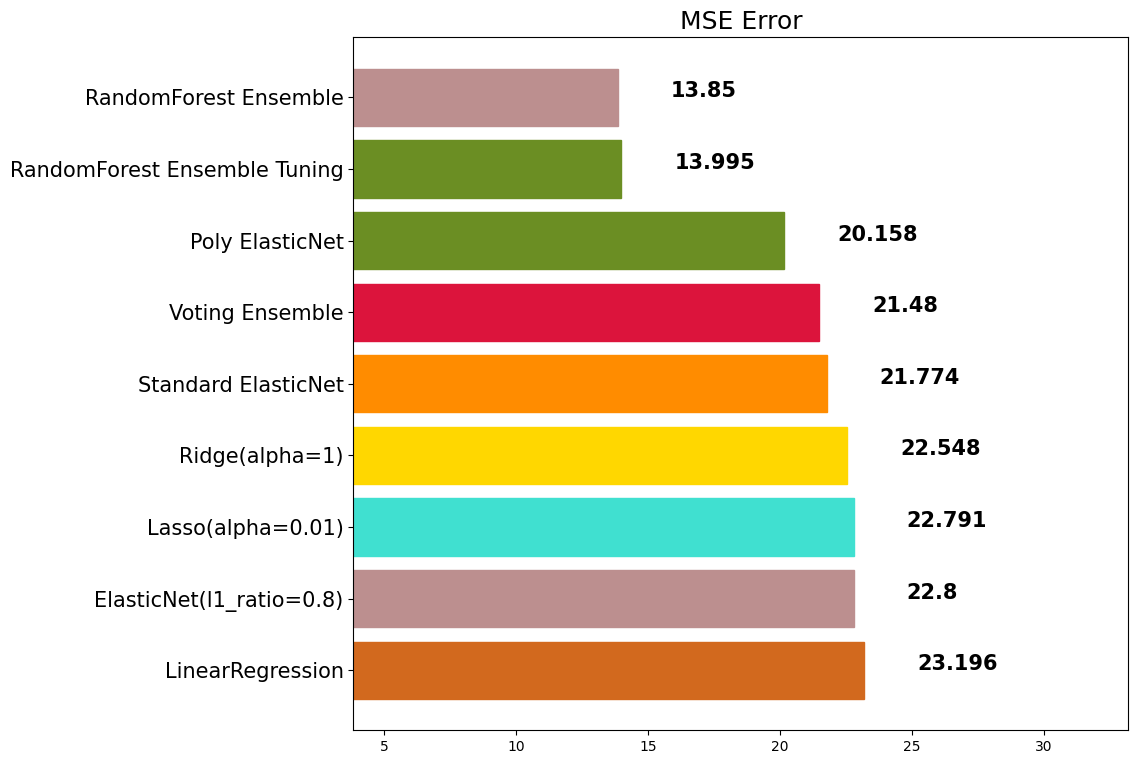

In [ ]:
rfr = RandomForestRegressor(random_state=10, n_estimators=1000, max_depth=7, max_features=0.9)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)
mse_eval('RandomForest Ensemble Tuning', rfr_pred, y_test)

### 1-5. 부스팅(Boosting)
* 약한 학습기를 순차적으로 학습을 하되, 이전 학습에 대하여 잘못 예측된 데이터에 가중치를 부여해 오차를 보완해 나가는 방식
* 장점: 성능이 매우 우수함(Lgbm, XGBoost)
* 단점: 부스팅 알고리즘의 특성상 계속 약점(오분류/잔차)을 보완하려고 하기 때문에 잘못된 레이블링이나 아웃라이어에 필요 이상으로 민감할 수 있음, 다른 앙상블 대비 학습 시간이 오래걸림
* 대표적인 Boosting 앙상블
  1. AdaBoost
  2. GradientBoost
  3. LightGBM(LGBM)
  4. XGBoost

### 1-6. GradientBoost
* 성능이 우수함
* 학습시간이 너무너무너무 느림

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier

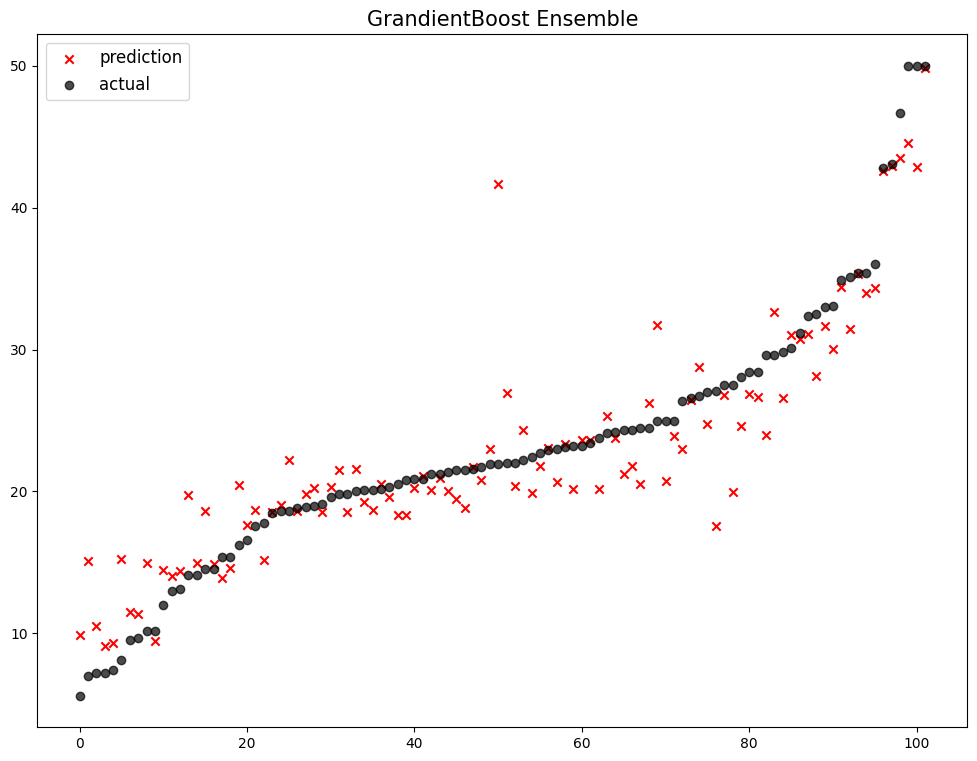

                          model        mse
0              LinearRegression  23.195599
1      ElasticNet(l1_ratio=0.8)  22.799971
2             Lasso(alpha=0.01)  22.791476
3                Ridge(alpha=1)  22.548159
4           Standard ElasticNet  21.773979
5               Voting Ensemble  21.480393
6               Poly ElasticNet  20.157646
7  RandomForest Ensemble Tuning  13.995044
8         RandomForest Ensemble  13.849757
9       GrandientBoost Ensemble  12.397870


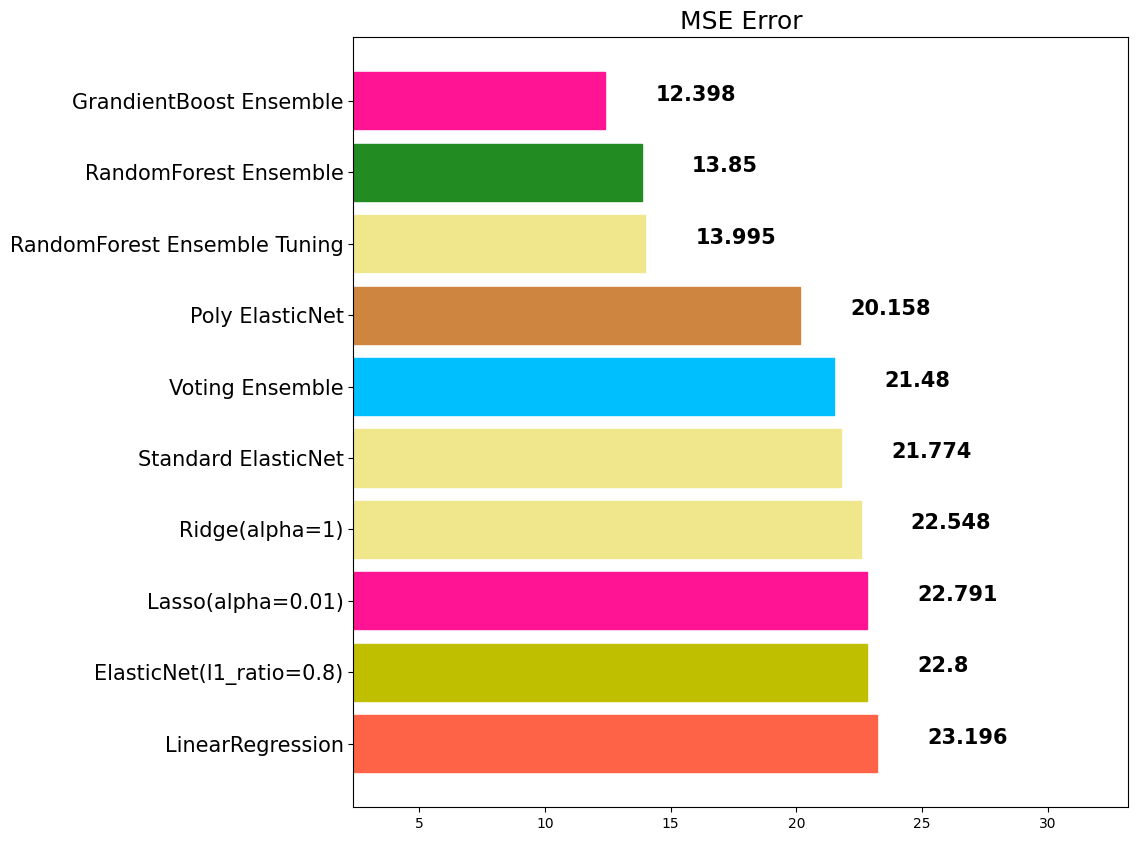

In [ ]:
gbr = GradientBoostingRegressor(random_state=10)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GrandientBoost Ensemble', gbr_pred, y_test)

* ------------하이퍼 파라미터------------
* learning_rate: 학습율. 너무 큰 학습율은 성능을 떨어뜨리고, 너무 작은 학습율은 학습이 느림. 적절한 값을 찾아야 함. n_estimators와 같이 튜닝. default=0.1
* n_estimators: 부스팅 스테이즈 수. (랜덤포레스트 트리의 개수 설정과 비슷한 개념). default=100

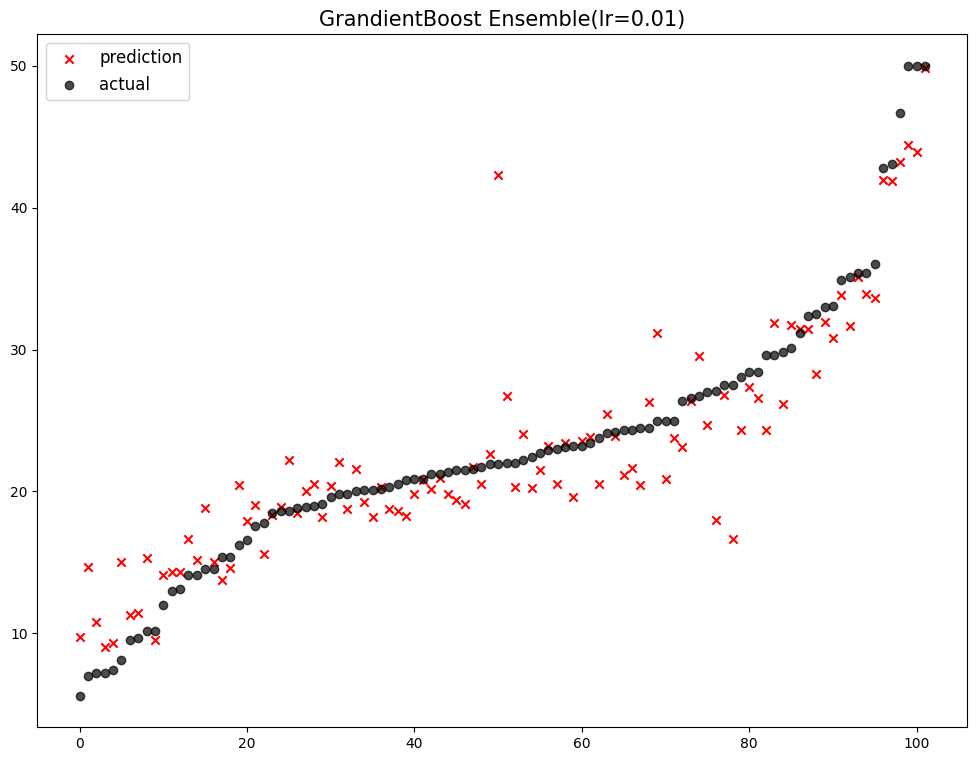

                               model        mse
0                   LinearRegression  23.195599
1           ElasticNet(l1_ratio=0.8)  22.799971
2                  Lasso(alpha=0.01)  22.791476
3                     Ridge(alpha=1)  22.548159
4                Standard ElasticNet  21.773979
5                    Voting Ensemble  21.480393
6                    Poly ElasticNet  20.157646
7       RandomForest Ensemble Tuning  13.995044
8              RandomForest Ensemble  13.849757
9   GrandientBoost Ensemble(lr=0.01)  12.745898
10           GrandientBoost Ensemble  12.397870


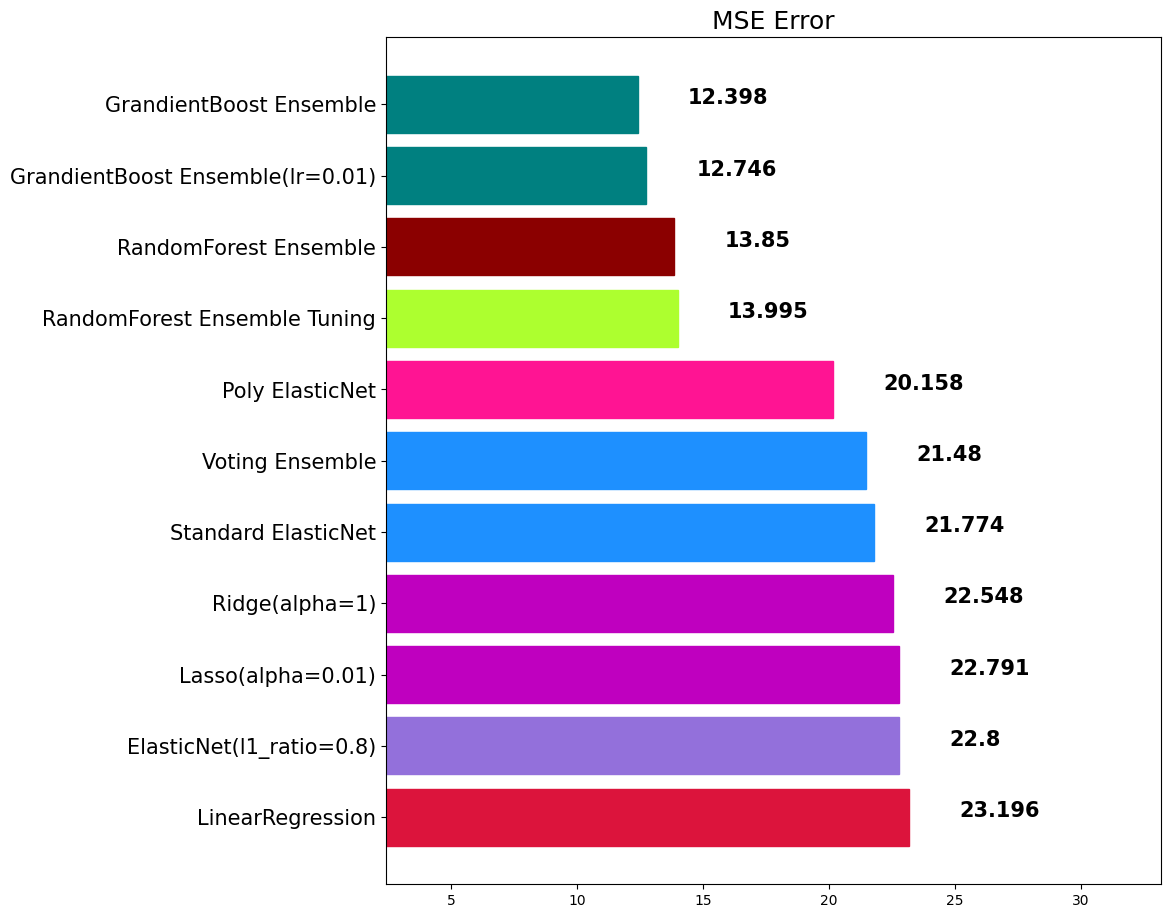

In [ ]:
gbr = GradientBoostingRegressor(random_state=10, learning_rate=0.01, n_estimators=1000)
gbr.fit(x_train, y_train)
gbr_pred = gbr.predict(x_test)
mse_eval('GrandientBoost Ensemble(lr=0.01)', gbr_pred, y_test)

### 1-7. XGBoost
* eXtreme Gradient Boosting
* scikit-learn 패키지가 아님
* 성능이 우수함
* GBM보다는 빠르고 성능도 향상
* 여전히 학습시간이 매우 느림

In [ ]:
from xgboost import XGBRegressor, XGBClassifier

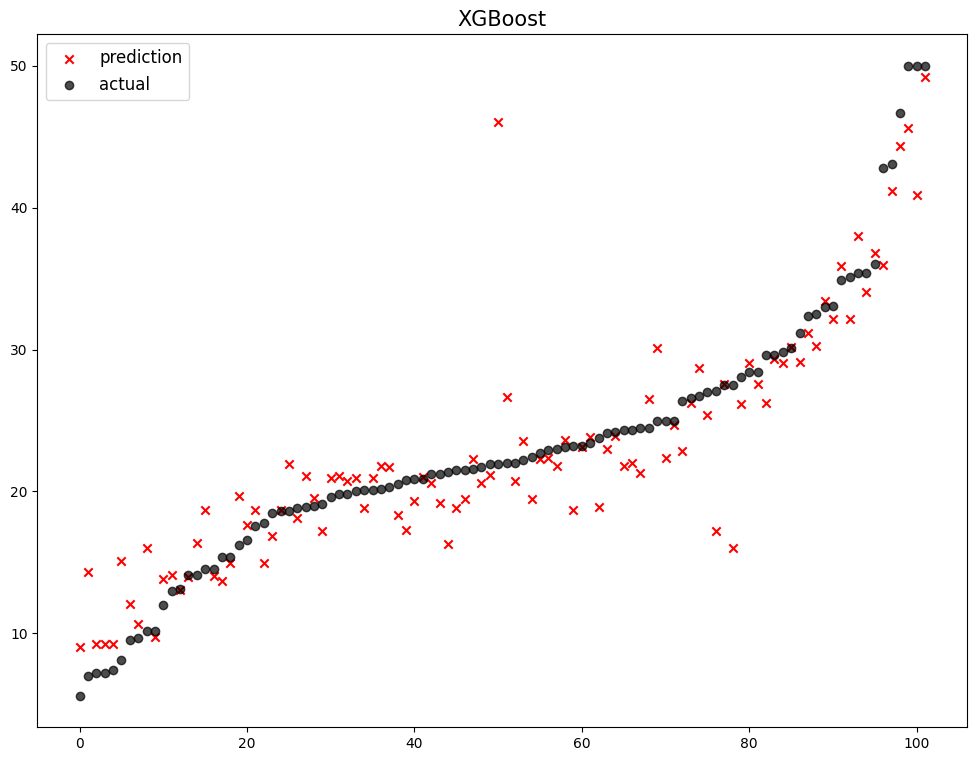

                               model        mse
0                   LinearRegression  23.195599
1           ElasticNet(l1_ratio=0.8)  22.799971
2                  Lasso(alpha=0.01)  22.791476
3                     Ridge(alpha=1)  22.548159
4                Standard ElasticNet  21.773979
5                    Voting Ensemble  21.480393
6                    Poly ElasticNet  20.157646
7                            XGBoost  14.690003
8       RandomForest Ensemble Tuning  13.995044
9              RandomForest Ensemble  13.849757
10  GrandientBoost Ensemble(lr=0.01)  12.745898
11           GrandientBoost Ensemble  12.397870


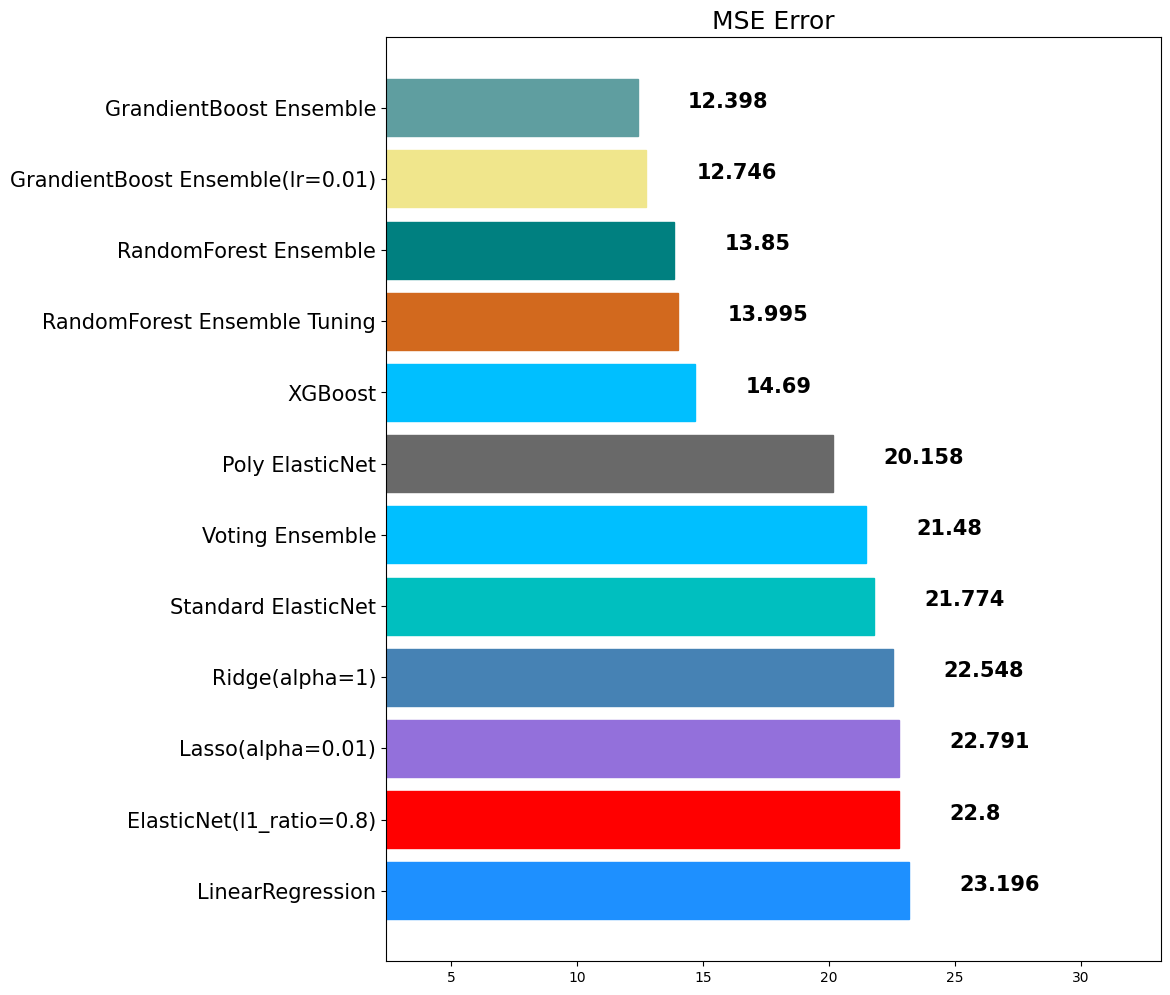

In [ ]:
xgb = XGBRegressor(random_state=10)
xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)
mse_eval('XGBoost', xgb_pred, y_test)

### 1-8. LightGBM
* scikit-learn 패키지가 아님
* 성능이 우수함
* 속도가 매우 빠름

In [ ]:
from lightgbm import LGBMRegressor, LGBMClassifier

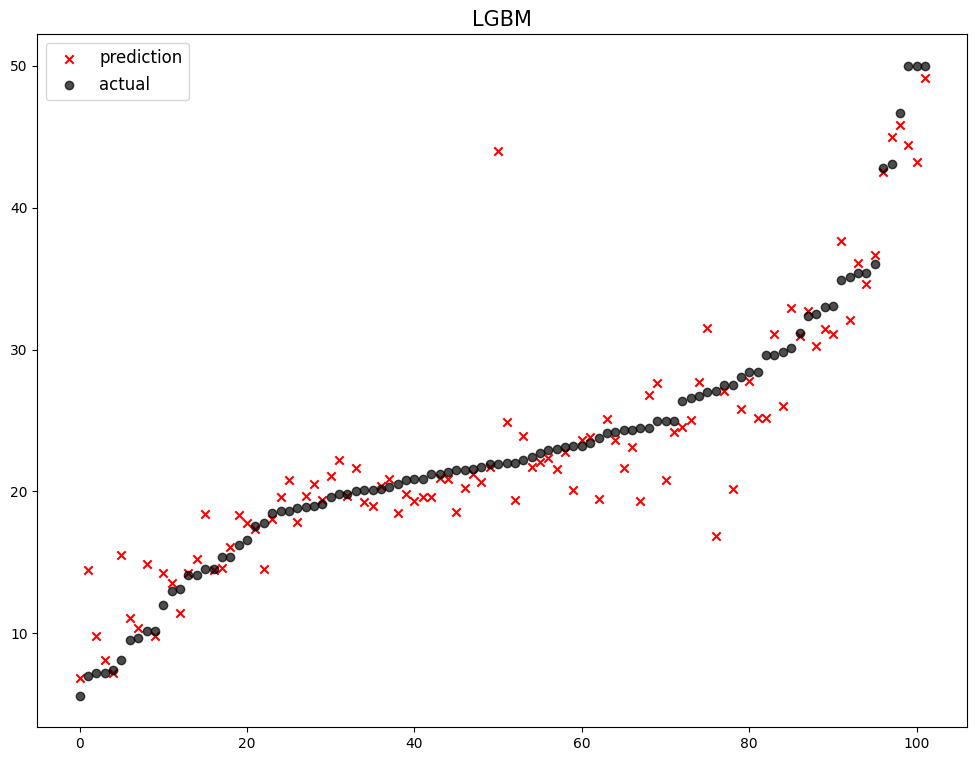

                               model        mse
0                   LinearRegression  23.195599
1           ElasticNet(l1_ratio=0.8)  22.799971
2                  Lasso(alpha=0.01)  22.791476
3                     Ridge(alpha=1)  22.548159
4                Standard ElasticNet  21.773979
5                    Voting Ensemble  21.480393
6                    Poly ElasticNet  20.157646
7                            XGBoost  14.690003
8       RandomForest Ensemble Tuning  13.995044
9              RandomForest Ensemble  13.849757
10  GrandientBoost Ensemble(lr=0.01)  12.745898
11           GrandientBoost Ensemble  12.397870
12                              LGBM  11.736960


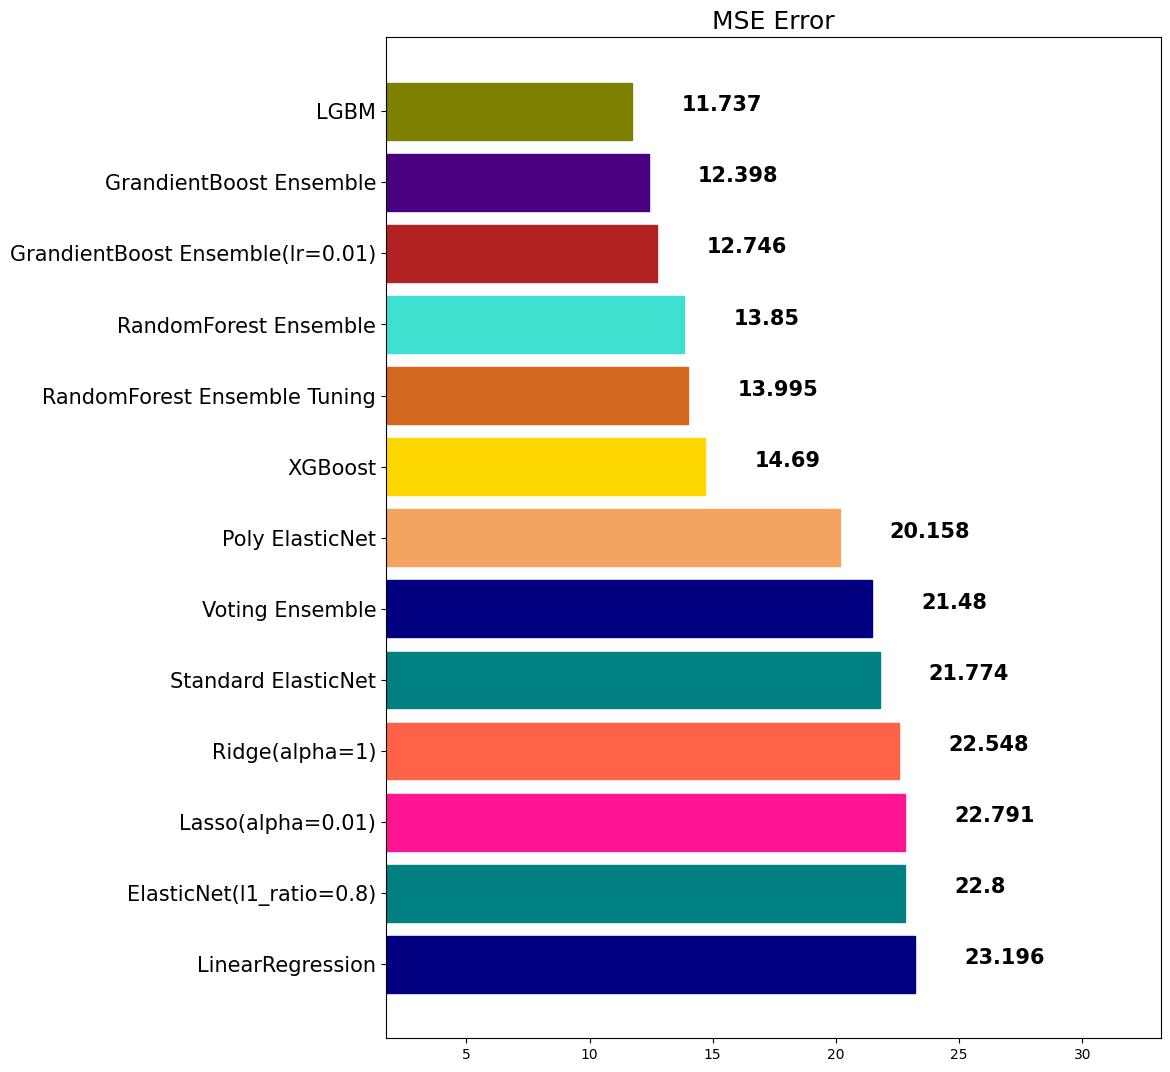

In [ ]:
lgbm = LGBMRegressor(random_state=10)
lgbm.fit(x_train, y_train)
lgbm_pred = lgbm.predict(x_test)
mse_eval('LGBM', lgbm_pred, y_test)

### 1-9. Stacking
* 개별 모델이 예측한 데이터를 기반으로 final_estimator를 종합하여 예측을 수행
* 성능을 극으로 끌어올릴 때 활용
* 과대적합을 유발할 수 있음(특히 데이터셋이 적은 경우)

In [ ]:
from sklearn.ensemble import StackingRegressor

In [ ]:
statck_models = [
    ('elasticnet', poly_pipeline),
    ('randomforest', rfr),
    ('gbr', gbr),
    ('lgbm', lgbm)
]

In [ ]:
stack_reg = StackingRegressor(statck_models, final_estimator=xgb, n_jobs=-1)
# final_estimator : 다 돌리고 나서 마지막에 한번 더 xgb로 돌린다

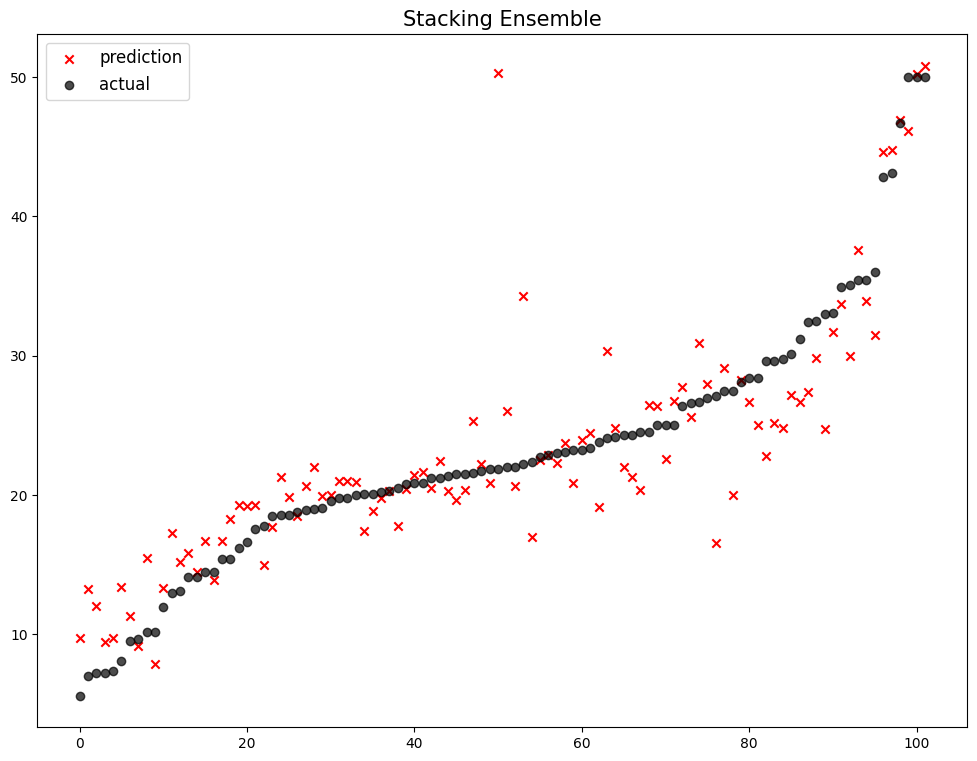

                               model        mse
0                   LinearRegression  23.195599
1           ElasticNet(l1_ratio=0.8)  22.799971
2                  Lasso(alpha=0.01)  22.791476
3                     Ridge(alpha=1)  22.548159
4                Standard ElasticNet  21.773979
5                    Voting Ensemble  21.480393
6                    Poly ElasticNet  20.157646
7                  Stacking Ensemble  18.721948
8                            XGBoost  14.690003
9       RandomForest Ensemble Tuning  13.995044
10             RandomForest Ensemble  13.849757
11  GrandientBoost Ensemble(lr=0.01)  12.745898
12           GrandientBoost Ensemble  12.397870
13                              LGBM  11.736960


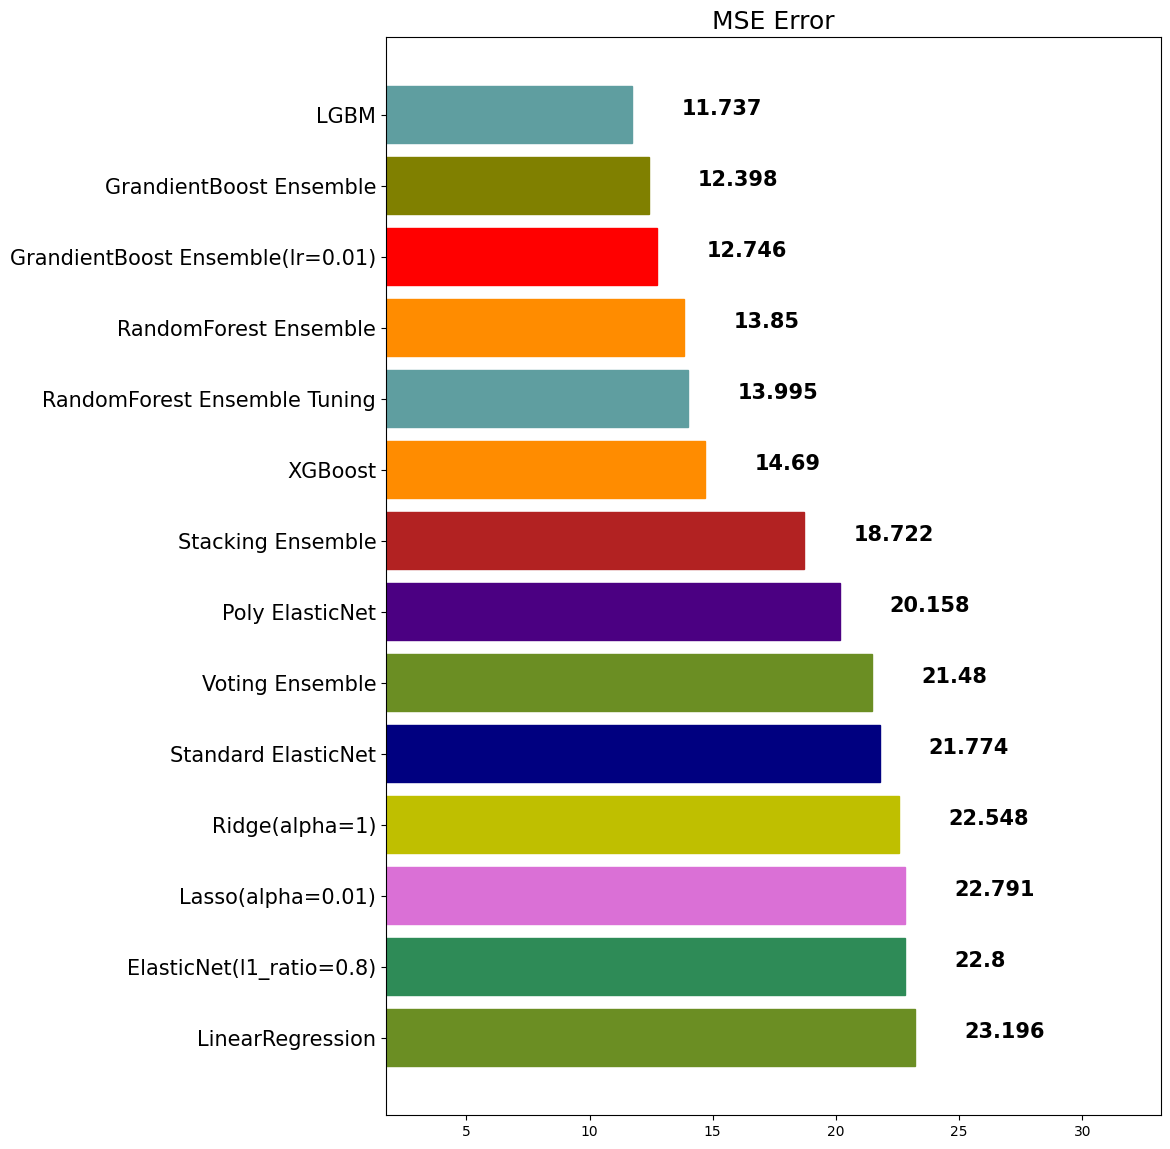

In [ ]:
stack_reg.fit(x_train, y_train)
stack_pred = stack_reg.predict(x_test)
mse_eval('Stacking Ensemble', stack_pred, y_test)

### 1-10. Weighted Blending
* 각 모델의 예측값에 대하여 weight를 곱하여 최종 output 계산
* 모델의 대한 가중치를 조절하여, 최종 output을 산출
* 가중치의 합은 1.0이 되도록 함

In [ ]:
final_outputs = {
    'elasticnet': poly_pred,
    'randomforest': rfr_pred,
    'gbr': gbr_pred,
    'xgb': xgb_pred,
    'lgbm': lgbm_pred,
    'stacking': stack_pred
}

# 예측값들을 넣는 것.

In [ ]:
final_prediction=\
final_outputs['elasticnet'] * 0.1\
+ final_outputs['randomforest'] * 0.1\
+ final_outputs['gbr'] * 0.2\
+ final_outputs['xgb'] * 0.25\
+ final_outputs['lgbm'] * 0.15\
+ final_outputs['stacking'] * 0.2

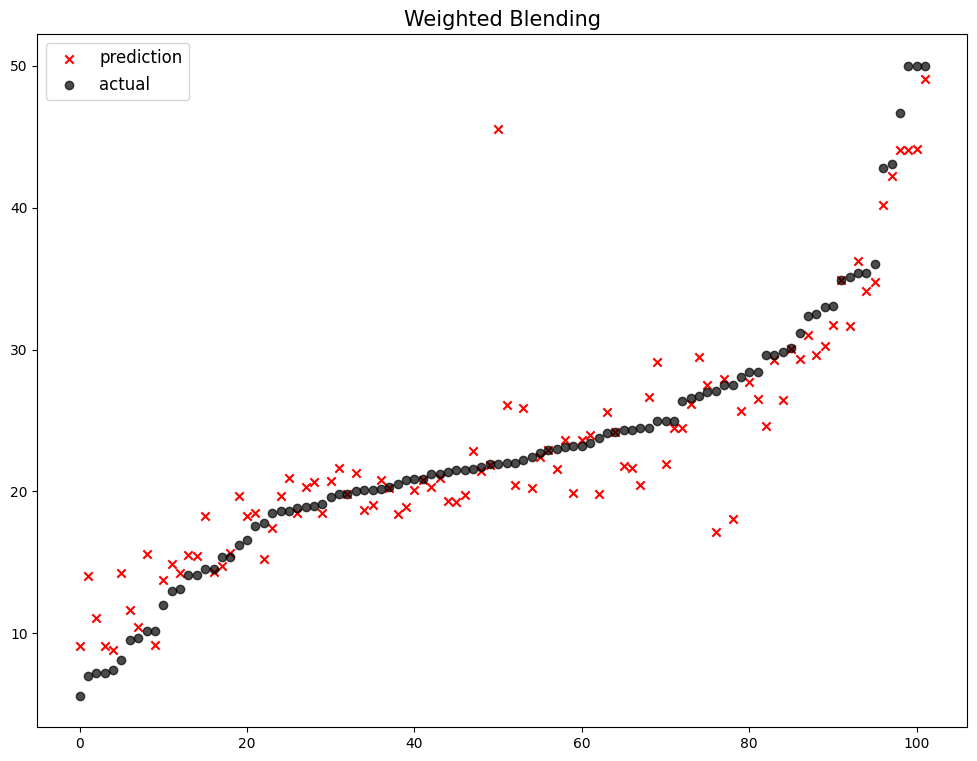

                               model        mse
0                   LinearRegression  23.195599
1           ElasticNet(l1_ratio=0.8)  22.799971
2                  Lasso(alpha=0.01)  22.791476
3                     Ridge(alpha=1)  22.548159
4                Standard ElasticNet  21.773979
5                    Voting Ensemble  21.480393
6                    Poly ElasticNet  20.157646
7                  Stacking Ensemble  18.721948
8                            XGBoost  14.690003
9       RandomForest Ensemble Tuning  13.995044
10             RandomForest Ensemble  13.849757
11                 Weighted Blending  12.853465
12  GrandientBoost Ensemble(lr=0.01)  12.745898
13           GrandientBoost Ensemble  12.397870
14                              LGBM  11.736960


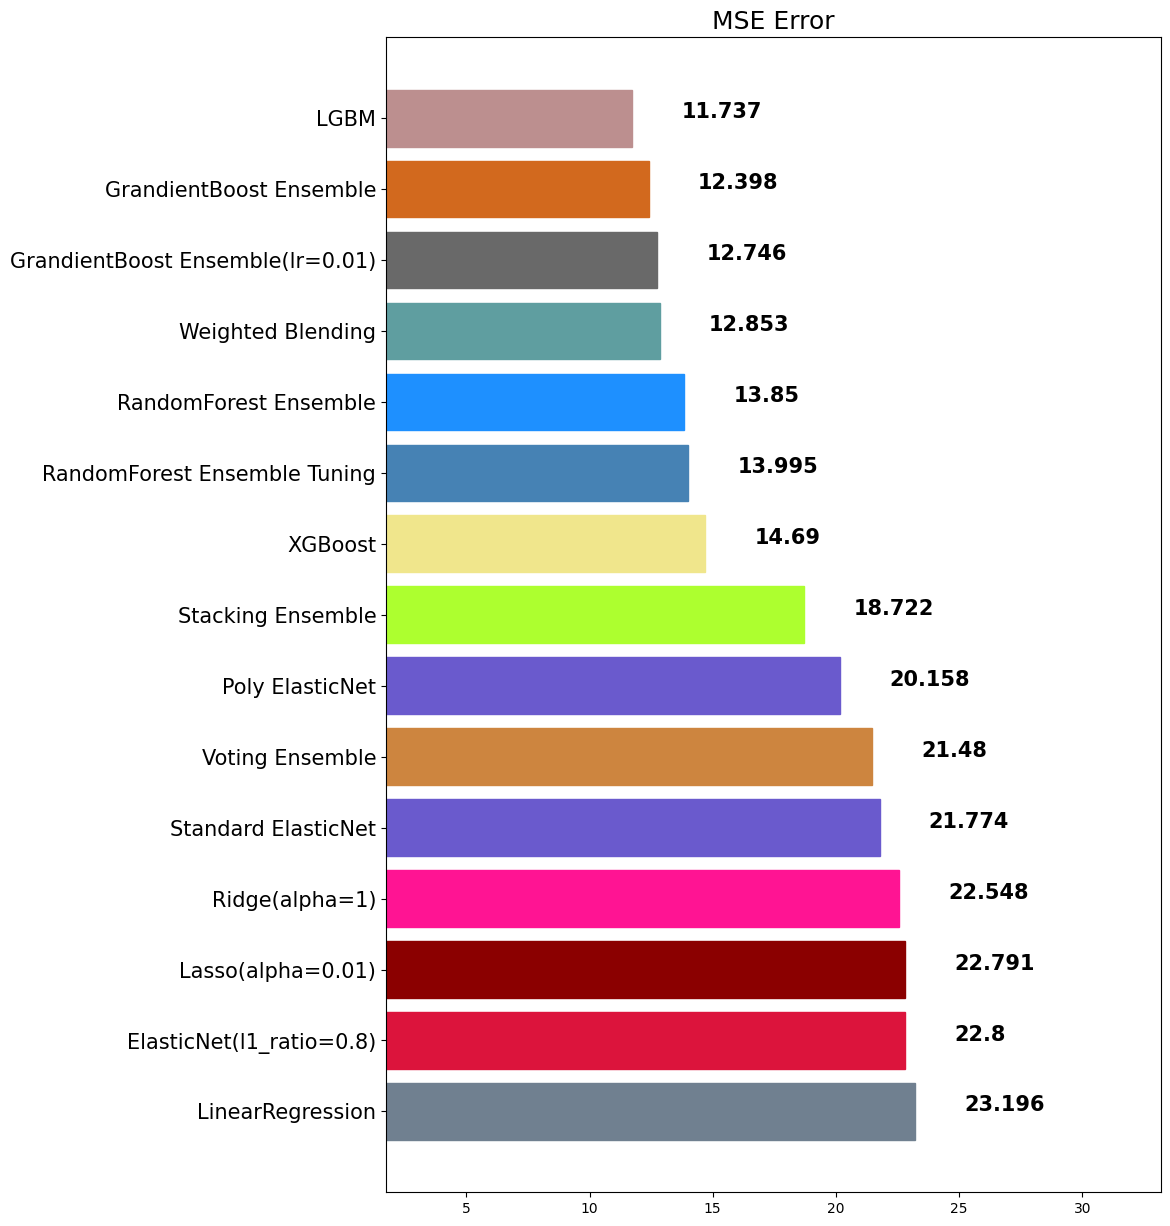

In [ ]:
mse_eval('Weighted Blending', final_prediction, y_test)

### 1-11. 앙상블 모델 정리
* 앙상블은 대체적으로 단일 모델 대비 성능이 좋음
* 앙상블을 앙상블하는 기법인 Stacking과 Weighted Blending도 고려해볼만한 기법
* 앙상블 모델은 적절한 하이퍼파라미터 튜닝이 매우 중요
* 앙상블 모델은 대체적으로 학습시간이 더 오래 걸림
* 모델 튜닝을 하는데 걸리는 시간이 오래 소요

# 2. 교차 검증(Cross Validation)

* 교차검증은 모델을 평가하는 하나의 방법
* K-겹 교차검증(K-fold Cross Validation)을 많이 활용
* K-fold 교차 검증은 모든 데이터가 최소 한 번은 테스트셋으로 쓰이도록 함

In [ ]:
# from IPython.display import Image

In [ ]:
# Image('kfold.png', width=800)

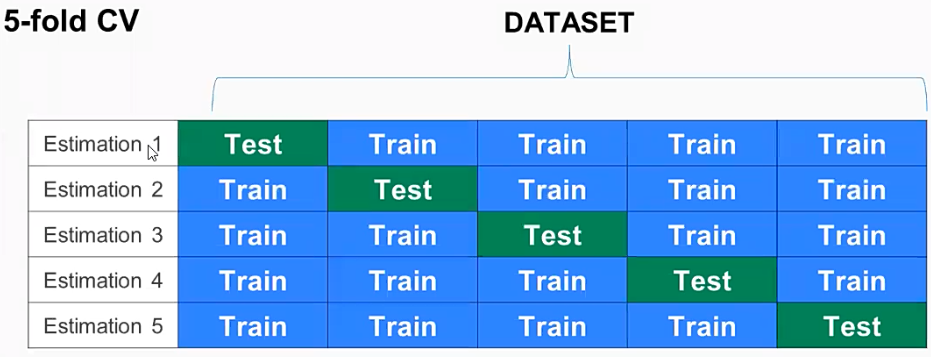

### 2-1. K-Fold Cross Validation Set 만들기

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
n_splits = 5
kfold = KFold(n_splits=n_splits, random_state=42, shuffle=True) 
# k-fold는 무조건 random_state 써야한다.
# shuffle(섞는 것)은 True로 같이 써야한다.

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,MEDV
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11,42.3
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26,50.0
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01,21.1
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65,17.7


In [ ]:
X = np.array(df_train.drop('MEDV', 1)) # 결과값을 제외하고 넣는다
Y = np.array(df_train['MEDV']) # 결과값만 넣는다.

<ipython-input-44-c7de634e1ba8>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_train.drop('MEDV', 1)) # 결과값을 제외하고 넣는다


In [ ]:
lgbm_fold = LGBMRegressor(random_state=42)

In [ ]:
i = 1
total_error = 0
for train_index, test_index in kfold.split(X):
    x_train_fold, x_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = Y[train_index], Y[test_index]
    lgbm_pred_fold = lgbm_fold.fit(x_train_fold, y_train_fold).predict(x_test_fold)
    error = mean_squared_error(lgbm_pred_fold, y_test_fold)
    print('Fold = {}, prediction score = {:.2f}'.format(i, error))
    total_error += error
    i+=1
print('---'*10)
print('Average Error: %s' % (total_error / n_splits))

Fold = 1, prediction score = 18.24
Fold = 2, prediction score = 11.78
Fold = 3, prediction score = 11.78
Fold = 4, prediction score = 10.39
Fold = 5, prediction score = 11.97
------------------------------
Average Error: 12.833485017003222


# 3. 하이퍼파라미터 튜닝

* 하이퍼파라미터 튜닝시 경수의 수가 너무 많음
* 자동화할 필요가 있음
* sklearn 패키지에서는 자주 사용되는 하이퍼파라미터 튜닝을 돕는 클래스가 존재
  * RandomizedSearchCV
  * GridSearchCV

### 3-1. RandomizedSearchCV
* 모든 매개변수값이 시도되는 것이 아니라 지정된 분포에서 고정된 수의 매개변수 설정이 샘플링됨
* 시도된 매개변수 설정의 수는 n_iter에 의해 제공됨

### ✔ 적용하는 방법
* 사용할 Search 방법을 선택
* hyperparameter 도메인을 설정 (max_depth, n_estimaters..등등)
* 학습을 시킨 후 기다림
* 도출된 결과 값을 모델에 적용하고 성능을 비교

In [ ]:
params = {
    'n_estimators': [200, 500, 1000, 2000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [6, 7, 8],
    'colsample_bytree': [0.8, 0.9, 1.0], # 샘플 사용 비율, (max_features와 비슷한 개념), 과대적합 방지용, default=1.0
    'subsample': [0.8, 0.9, 1.0]
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# n_iter: 총 몇회의 시도를 진행할 것인지 정의(횟수가 늘어나면 좋은 parameter를 찾을 확률이 높지만 그만큼 시간이 오래걸림)
# cv: 검증을 위한 분할 검증 횟수
clf = RandomizedSearchCV(LGBMRegressor(), params, random_state=10, n_iter=25, cv=3, scoring='neg_mean_squared_error')

In [ ]:
clf.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=25,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.05, 0.01],
                                        'max_depth': [6, 7, 8],
                                        'n_estimators': [200, 500, 1000, 2000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=10, scoring='neg_mean_squared_error')

In [ ]:
clf.best_score_

-15.461461033335068

In [ ]:
clf.best_params_

{'subsample': 0.8,
 'n_estimators': 1000,
 'max_depth': 8,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8}

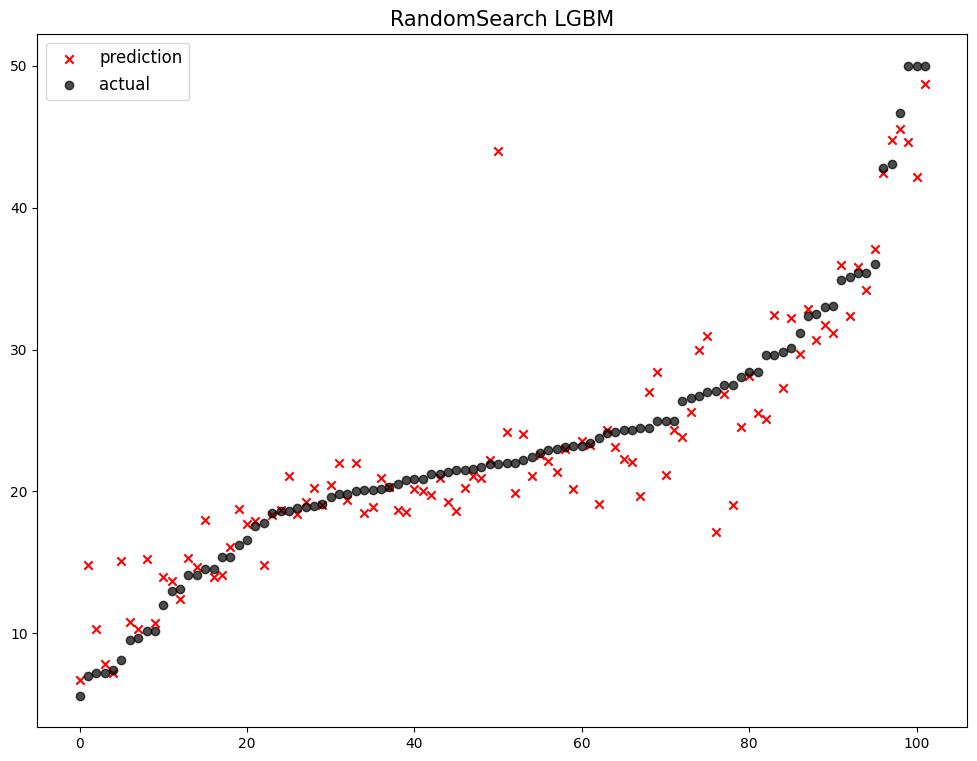

                               model        mse
0                   LinearRegression  23.195599
1           ElasticNet(l1_ratio=0.8)  22.799971
2                  Lasso(alpha=0.01)  22.791476
3                     Ridge(alpha=1)  22.548159
4                Standard ElasticNet  21.773979
5                    Voting Ensemble  21.480393
6                    Poly ElasticNet  20.157646
7                  Stacking Ensemble  18.721948
8                            XGBoost  14.690003
9       RandomForest Ensemble Tuning  13.995044
10             RandomForest Ensemble  13.849757
11                 Weighted Blending  12.853465
12  GrandientBoost Ensemble(lr=0.01)  12.745898
13                   GridSearch LGBM  12.672312
14           GrandientBoost Ensemble  12.397870
15                 RandomSearch LGBM  12.012264
16                              LGBM  11.736960


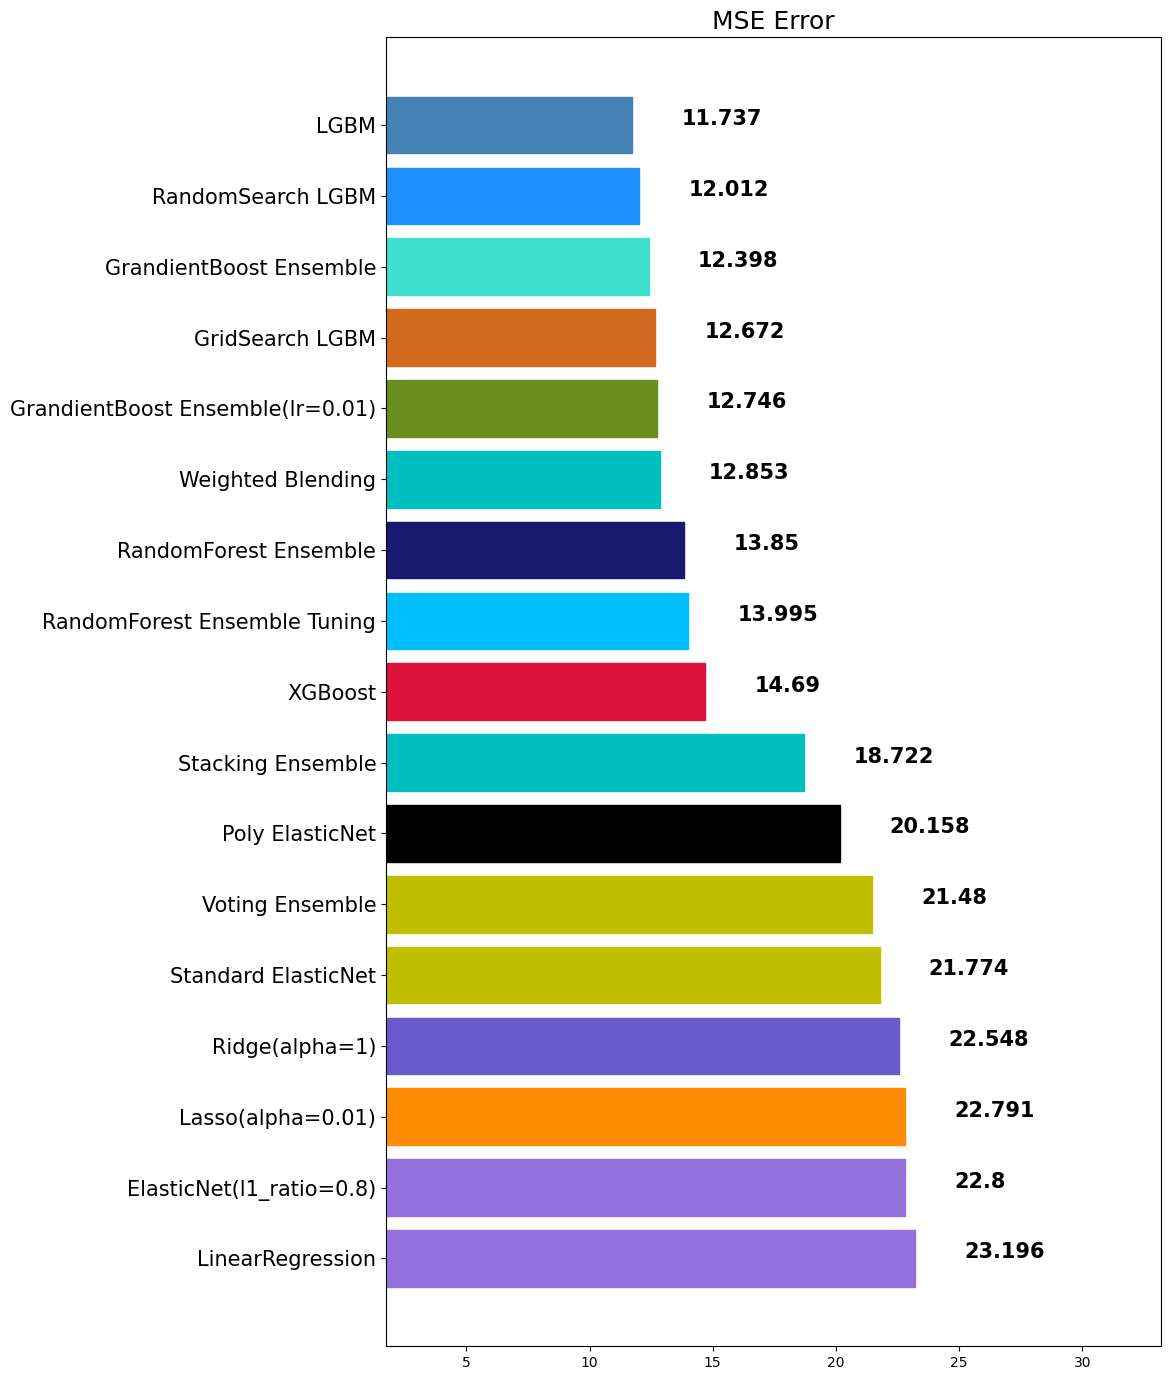

In [ ]:
lgbm_best = LGBMRegressor(subsample=0.8, n_estimators=1000, max_depth=8, learning_rate=0.01, colsample_bytree=0.8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('RandomSearch LGBM', lgbm_best_pred, y_test)

### 3-2. GridSearchCV
* 모든 매개변수 값에 대하여 완전 탐색을 시도
* 최적화할 파라미터가 많다면 시간이 매우 오래 걸림

In [ ]:
params = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [7, 8],
    'colsample_bytree': [0.8, 0.9],
    'subsample': [0.8, 0.9]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [7, 8], 'n_estimators': [500, 1000],
                         'subsample': [0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_score_

-15.461461033335068

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.01,
 'max_depth': 8,
 'n_estimators': 1000,
 'subsample': 0.8}

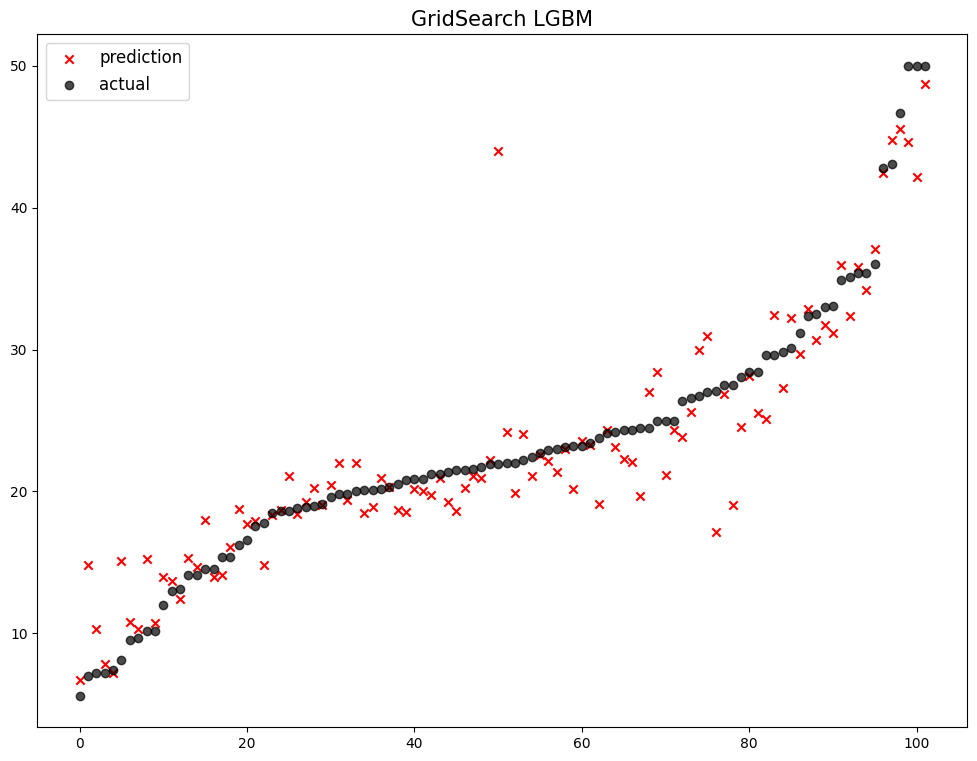

                               model        mse
0                   LinearRegression  23.195599
1           ElasticNet(l1_ratio=0.8)  22.799971
2                  Lasso(alpha=0.01)  22.791476
3                     Ridge(alpha=1)  22.548159
4                Standard ElasticNet  21.773979
5                    Voting Ensemble  21.480393
6                    Poly ElasticNet  20.157646
7                  Stacking Ensemble  18.721948
8                            XGBoost  14.690003
9       RandomForest Ensemble Tuning  13.995044
10             RandomForest Ensemble  13.849757
11                 Weighted Blending  12.853465
12  GrandientBoost Ensemble(lr=0.01)  12.745898
13           GrandientBoost Ensemble  12.397870
14                 RandomSearch LGBM  12.012264
15                   GridSearch LGBM  12.012264
16                              LGBM  11.736960


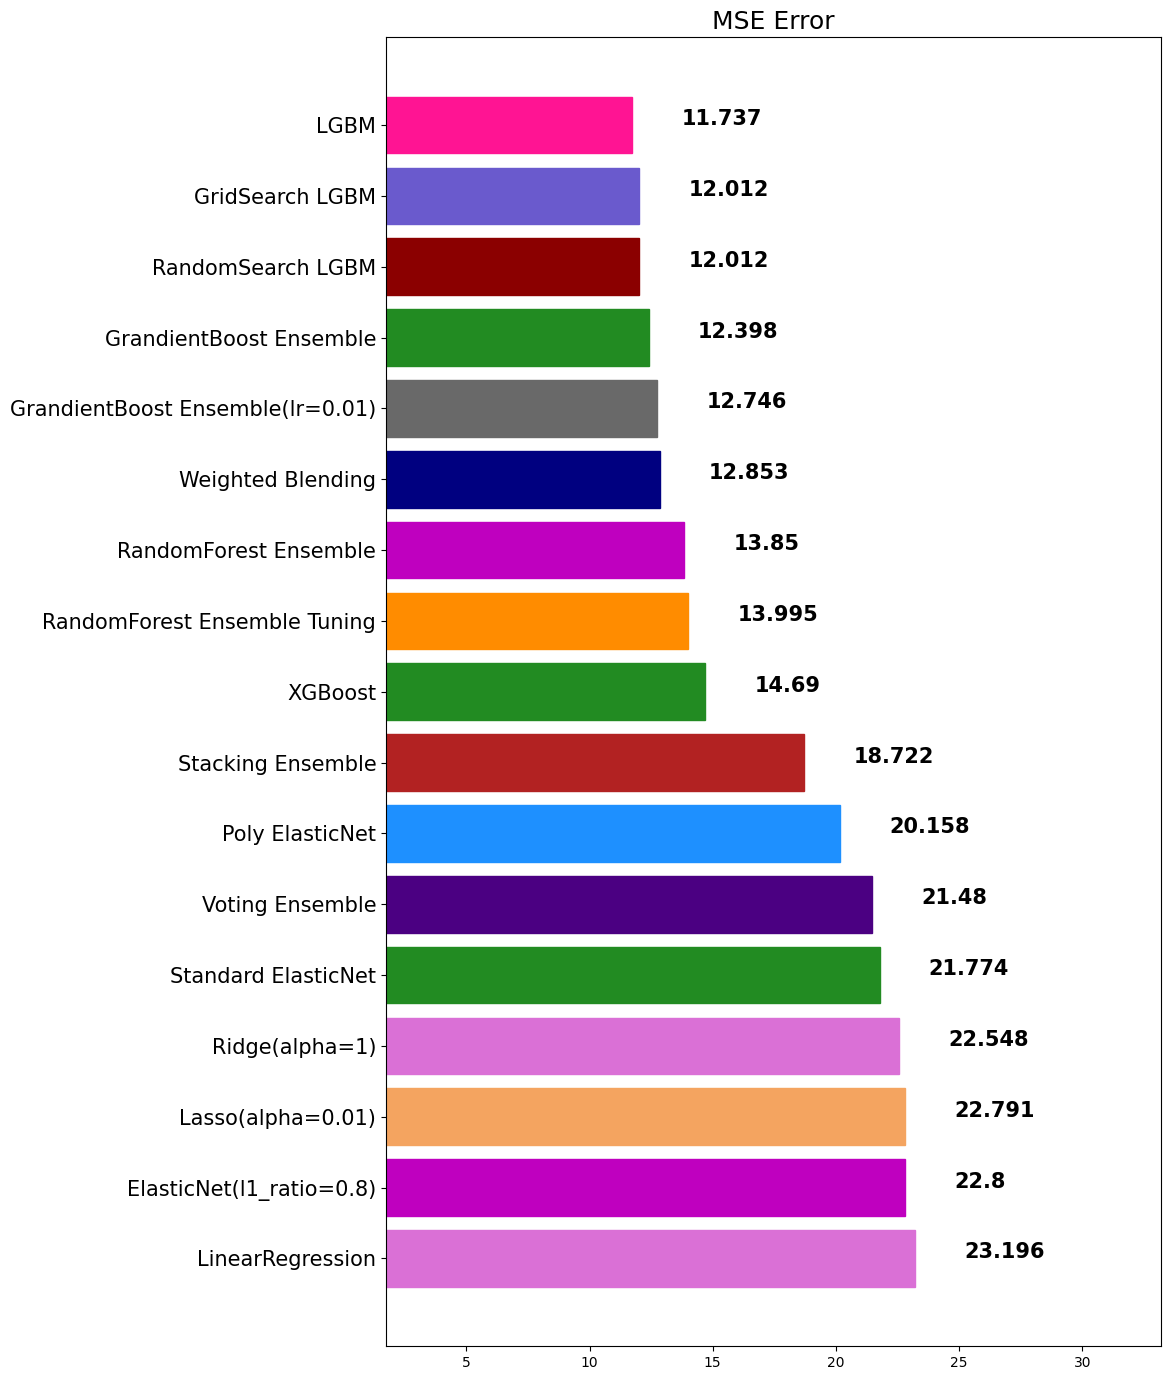

In [ ]:
lgbm_best = LGBMRegressor(n_estimators=1000, subsample=0.8, colsample_bytree=0.8, learning_rate=0.01, max_depth=8)
lgbm_best_pred = lgbm_best.fit(x_train, y_train).predict(x_test)
mse_eval('GridSearch LGBM', lgbm_best_pred, y_test)